# Measles Multistrade Project


## Neccesay Pythomn & EpiMoRPH Packages


In [1]:
from sympy import symbols, Matrix, parse_expr, Max
import pandas as pd
from datetime import date, datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import geopandas as gpd
from PIL import Image
import os
import requests
import time
import ast
import random
from IPython.display import Image
from typing import cast
import pygris
from census import Census
from PIL import Image
from pygris import (
    block_groups,
    counties,
    primary_secondary_roads,
    school_districts,
    tracts,
)
from pygris.geocode import geocode
from shapely.geometry import Point, mapping
from functools import partial
import networkx as nx

from epymorph import *
from epymorph.compartment_model import *
from epymorph.data_shape import Shapes
from epymorph.geography.us_census import BlockGroupScope
from epymorph.simulation import AttributeDef
from epymorph.data import ipm_library, mm_library
from epymorph.geography.us_census import BlockGroupScope
from epymorph.data_type import CentroidDType
from epymorph.geography.us_census import BLOCK_GROUP, BlockGroupScope
from epymorph.geography.us_census import TRACT, TractScope
from epymorph.geography.us_tiger import get_tracts_geo

# ruff: noqa: F405
from epymorph import *  # noqa: F403
from epymorph.adrio import acs5, commuting_flows, us_tiger
from epymorph.data.pei import pei_humidity
from epymorph.geography.us_census import BlockGroupScope
from epymorph.rume import MultistrataRumeBuilder
from typing import Sequence
from epymorph.compartment_model import *
from epymorph.compartment_model import ModelSymbols
from epymorph.simulation import AttributeDef
from epymorph.simulator.basic.output import Output

# Selecting Locastion


In [2]:
STATE = input("Enter a State: ")
COUNTY = input("Enter a County: ")
YEAR = int(input("Enter a Year: "))

In [3]:
School_Year_Start = datetime.strptime("2019-08-05", "%Y-%m-%d")
School_Year_End = datetime.strptime("2020-05-25", "%Y-%m-%d")

School_Year_Start = pd.to_datetime(School_Year_Start)
School_Year_End = pd.to_datetime(School_Year_End)

School_Year_length = (School_Year_End - School_Year_Start).days

School_Year_Start_str = School_Year_Start.strftime("%Y-%m-%d")
School_Year_End_str = School_Year_End.strftime("%Y-%m-%d")

School_Year_Start_2023 = School_Year_Start.replace(year=2023)
end_date = School_Year_End.replace(year=2024)

In [4]:
districts = school_districts(state=STATE, year=YEAR)

Using FIPS code '04' for input 'AZ'


In [5]:
state_fips = "08"
county_fips = "029"
districts = school_districts(state="AZ", year=2019)
STATE = "AZ"

Using FIPS code '04' for input 'AZ'


# GEO


In [27]:
########################################################## Enduser Input #################################################################
crs_to_use = "EPSG:4269"


dir = os.path.expanduser(
    "~/Desktop/Github/EpiMoRPH-Modeling/social-determinate-of-health/scratch/Movement_model"
)
powerpoint = os.path.expanduser(
    "~/Desktop/Github/EpiMoRPH-Modeling/social-determinate-of-health/scratch/powerpoints/School_movement_01-22-24"
)

census = Census("98a3a86a5708b65b92a50cc76d8d67280efbeb5d")

CentroidDType = np.dtype([("longitude", np.float64), ("latitude", np.float64)])

census_block_groups = block_groups(state=STATE, county=COUNTY, year=YEAR, cache=False)

census_block_groups = census_block_groups.to_crs(crs_to_use)

state_fips_list = census_block_groups["STATEFP"].unique()
county_fips_list = census_block_groups["COUNTYFP"].unique()

state_fips = ",".join(map(str, state_fips_list))
county_fips = ",".join(map(str, county_fips_list))
census_block_groups = census_block_groups[["GEOID", "geometry", "ALAND"]]
CNTY = state_fips + county_fips

####################################################### Census #########################################################
AGE_VARS = [
    # School Age Population (Male): B01001_003-B01001_007
    "B01001_003E",  # Population (Male) 0-4 years
    "B01001_004E",  # Population (Male) 5-9 years
    "B01001_005E",  # Population (Male) 10-14 years
    "B01001_006E",  # Population (Male) 15-17 years
    "B01001_007E",  # Population (Male) 18-19 years
    # Adult Population (Male): B01001_008-B01001_016
    "B01001_008E",  # Population (Male) 20 years
    "B01001_009E",  # Population (Male) 21 years
    "B01001_010E",  # Population (Male) 22-24 years
    "B01001_011E",  # Population (Male) 25-29 years
    "B01001_012E",  # Population (Male) 30-34 years
    "B01001_013E",  # Population (Male) 35-39 years
    "B01001_014E",  # Population (Male) 40-44 years
    "B01001_015E",  # Population (Male) 45-49 years
    "B01001_016E",  # Population (Male) 50-54 years
    # Elder Population (Male): B01001_017-B01001_025
    "B01001_017E",  # Population (Male) 55-59 years
    "B01001_018E",  # Population (Male) 60-61 years
    "B01001_019E",  # Population (Male) 62-64 years
    "B01001_020E",  # Population (Male) 65-66 years
    "B01001_021E",  # Population (Male) 67-69 years
    "B01001_022E",  # Population (Male) 70-74 years
    "B01001_023E",  # Population (Male) 75-79 years
    "B01001_024E",  # Population (Male) 80-84 years
    "B01001_025E",  # Population (Male) 85+ years
    # School Age Population (Female): B01001_027-B01001_031
    "B01001_027E",  # Population (Female) 0-4 years
    "B01001_028E",  # Population (Female) 5-9 years
    "B01001_029E",  # Population (Female) 10-14 years
    "B01001_030E",  # Population (Female) 15-17 years
    "B01001_031E",  # Population (Female) 18-19 years
    # Adult Population (Female): B01001_032-B01001_040
    "B01001_032E",  # Population (Female) 20 years
    "B01001_033E",  # Population (Female) 21 years
    "B01001_034E",  # Population (Female) 22-24 years
    "B01001_035E",  # Population (Female) 25-29 years
    "B01001_036E",  # Population (Female) 30-34 years
    "B01001_037E",  # Population (Female) 35-39 years
    "B01001_038E",  # Population (Female) 40-44 years
    "B01001_039E",  # Population (Female) 45-49 years
    "B01001_040E",  # Population (Female) 50-54 years
    # Elder Population (Female): B01001_041-B01001_049
    "B01001_041E",  # Population (Female) 55-59 years
    "B01001_042E",  # Population (Female) 60-61 years
    "B01001_043E",  # Population (Female) 62-64 years
    "B01001_044E",  # Population (Female) 65-66 years
    "B01001_045E",  # Population (Female) 67-69 years
    "B01001_046E",  # Population (Female) 70-74 years
    "B01001_047E",  # Population (Female) 75-79 years
    "B01001_048E",  # Population (Female) 80-84 years
    "B01001_049E",  # Population (Female) 85+ years
]

SCHOOL_VARS = [
    "B14007_002E",  # Enrolled in nursery school, preschool
    "B14007_003E",  # Enrolled in kindergarten
    "B14007_004E",  # Enrolled in grade 1
    "B14007_005E",  # Enrolled in grade 2
    "B14007_006E",  # Enrolled in grade 3
    "B14007_007E",  # Enrolled in grade 4
    "B14007_008E",  # Enrolled in grade 5
    "B14007_009E",  # Enrolled in grade 6
    "B14007_010E",  # Enrolled in grade 7
    "B14007_011E",  # Enrolled in grade 8
    "B14007_012E",  # Enrolled in grade 9
    "B14007_013E",  # Enrolled in grade 10
    "B14007_014E",  # Enrolled in grade 11
    "B14007_015E",  # Enrolled in grade 12
]

# CBG data
query1 = {"for": "block group: *", "in": f"state: {state_fips} county: {county_fips}"}
cbgs_raw = census.acs5.get(
    [
        "B01003_001E",  # Total Population
    ],
    query1,
    year=YEAR,
)

cbgs_errollemt_raw = census.acs5.get(SCHOOL_VARS, query1, year=YEAR)
cbgs_age_raw = census.acs5.get(AGE_VARS, query1, year=YEAR)

cbgs_geog = pygris.block_groups(
    state=state_fips, county=county_fips, year=YEAR, cache=True
)

cbgs = pd.DataFrame.from_records(cbgs_raw)
cbgs.fillna(0, inplace=True)
cbgs.replace(-666666666, 0, inplace=True)

tract_geoids = cbgs["state"] + cbgs["county"] + cbgs["tract"]
geoids = tract_geoids + cbgs["block group"]

cbgs = pd.DataFrame(
    {
        "geoid": geoids,
        "population": cbgs["B01003_001E"].astype(np.int64),
    }
)

# Merge geo info
cbgs = cbgs.merge(
    pd.DataFrame(
        {
            "geoid": cbgs_geog["GEOID"],
            "centroid": cbgs_geog["geometry"].apply(lambda row: row.centroid.coords[0]),
            # TIGER areas are in m^2; divide by 1e6 to get km^2
            "area": cbgs_geog.ALAND / 1e6,
        }
    ),
    on="geoid",
)

cbgs.sort_values(by="geoid", inplace=True)
cbgs.reset_index(drop=True, inplace=True)

# Drop the same CBGs as above using an inner merge
cbgs_age = pd.DataFrame.from_records(cbgs_age_raw)
cbgs_age.astype(np.int64)

geoids = (
    cbgs_age["state"] + cbgs_age["county"] + cbgs_age["tract"] + cbgs_age["block group"]
)
cbgs_age.insert(len(cbgs_age.columns), "geoid", geoids)
cbgs_age = cbgs[["geoid"]].merge(cbgs_age, how="inner", on="geoid")
cbgs_age.reset_index(drop=True, inplace=True)
cbgs_age.drop(columns=["geoid"], inplace=True)


def bracketize(brackets: dict[str, int]) -> pd.DataFrame:
    """Using the brackets info sum the age groups for both male and female."""
    sex_offset = sum(brackets.values())

    ranges = dict[str, tuple[slice, slice]]()
    age_offset = 0
    for key, count in brackets.items():
        i_m = age_offset
        i_f = age_offset + sex_offset
        ranges[key] = slice(i_m, i_m + count), slice(i_f, i_f + count)
        age_offset += count

    return pd.DataFrame(
        {
            key: (
                cbgs_age.iloc[:, slice_m].sum(axis=1)
                + cbgs_age.iloc[:, slice_f].sum(axis=1)
            )
            for key, (slice_m, slice_f) in ranges.items()
        },
        dtype=np.int64,
    )


cbgs_age_2 = bracketize(
    {
        "00-19": 5,
        "20-54": 9,
        "55+": 9,
    }
)

data = {
    "label": cbgs["geoid"].to_numpy(dtype=np.str_),
    "centroid": cbgs["centroid"].to_numpy(dtype=CentroidDType),
    "population": cbgs["population"].to_numpy(dtype=np.int64),
    "population_by_age": cbgs_age_2.to_numpy(dtype=np.int64),
    'area km^2': cbgs['area'].to_numpy(dtype=np.int64),
}

census_df = pd.DataFrame({k: list(v) for k, v in data.items()})
census_block_groups = pd.merge(
    census_df, census_block_groups, left_on="label", right_on="GEOID"
)
census_block_groups = gpd.GeoDataFrame(
    census_block_groups, geometry=census_block_groups["geometry"]
).set_crs(epsg=4269, inplace=True)

census_df

Using FIPS code '04' for input 'AZ'
Using FIPS code '013' for input 'Maricopa'


,label,centroid,population,population_by_age,area km^2
0,040130101011,"[-111.77075643330394, 33.76924660709943]",1791,"[358, 781, 652]",18
1,040130101012,"[-111.72000671148204, 33.7410933260103]",2007,"[162, 423, 1422]",29
2,040130101013,"[-111.66697569766907, 33.72404113568911]",1264,"[0, 22, 1242]",6
3,040130101021,"[-111.49136471795472, 33.71546544071483]",1139,"[58, 413, 668]",2368
4,040130101022,"[-111.8505100649063, 33.82609833466325]",1487,"[110, 284, 1093]",11
...,...,...,...,...,...
2500,040139801001,"[-112.88186166490277, 32.66947221385736]",0,"[0, 0, 0]",2912
2501,040139804001,"[-111.95879092988882, 33.298073567638134]",13,"[0, 9, 4]",3
2502,040139805001,"[-111.88633119332626, 33.24392529871578]",0,"[0, 0, 0]",3
2503,040139806001,"[-111.61909767565444, 33.33555256790642]",4291,"[1397, 2251, 643]",9


In [29]:
def fetch_geo(scope: BlockGroupScope):
    census = Census(os.environ.get("CENSUS_API_KEY"))

    def query_pop_by_age(state_fips: str, county_fips: str, tract_ids: list[str]):
        query_result = census.acs5.get(
            "group(B01001)",
            geo={
                "for": f"tract:{','.join(tract_ids)}",
                "in": f"state:{state_fips} county:{county_fips}",
            },
            year=2021,
        )

        raw_df = pd.DataFrame.from_records(query_result).astype(
            {
                "state": np.str_,
                "county": np.str_,
                "tract": np.str_,
            }
        )

        def group_cols(
            first: int, last: int, *, source: pd.DataFrame, table: str, dtype
        ) -> pd.Series:
            def est_name(line: int) -> str:
                return f"{table}_{line:03d}E"

            result = source[est_name(first)]
            for i in range(first + 1, last + 1):
                result = result + source[est_name(i)]
            return result.astype(dtype)

        group = partial(group_cols, source=raw_df, table="B01001", dtype=np.int64)

        tracts_gdf = get_block_groups_geo(year=scope.year)  # type: ignore
        calc_centroid = lambda x: x.centroid.coords[0]
        centroid_df = pd.DataFrame(
            {
                "geoid": tracts_gdf["GEOID"].astype(str),
                "centroid": tracts_gdf["geometry"].apply(calc_centroid),
            }
        )

        return pd.DataFrame(
            {
                "geoid": raw_df["state"] + raw_df["county"] + raw_df["tract"],
                "population_00-19": group(3, 8) + group(27, 32),
                "population_20-59": group(9, 17) + group(33, 41),
                "population_60-79": group(18, 24) + group(42, 48),
            }
        ).merge(centroid_df, on="geoid", how="left")

    geoid_parts = list(map(BLOCK_GROUP.decompose, scope.get_node_ids()))

    # Assumes our scope only contains one state and one county (which it should)
    age_df = query_pop_by_age(
        state_fips=geoid_parts[0][0],
        county_fips=geoid_parts[0][1],
        tract_ids=[t for _, _, t in geoid_parts],
    )

    age_df["population"] = (
        age_df["population_00-19"]
        + age_df["population_20-59"]
        + age_df["population_60-79"]
    )

    return StaticGeo(
        spec=StaticGeoSpec(
            scope=scope,
            attributes=[
                AttributeDef("label", str, Shapes.N),
                AttributeDef("geoid", str, Shapes.N),
                AttributeDef("centroid", CentroidType, Shapes.N),
                AttributeDef("population", int, Shapes.N),
                AttributeDef("population_00-19", int, Shapes.N),
                AttributeDef("population_20-59", int, Shapes.N),
                AttributeDef("population_60-79", int, Shapes.N),
            ],
            time_period=NO_DURATION,
        ),
        values={
            "label": age_df["geoid"].to_numpy(dtype=np.str_),
            "geoid": age_df["geoid"].to_numpy(dtype=np.str_),
            "centroid": age_df["centroid"].to_numpy(dtype=CentroidDType),
            "population": age_df["population"].to_numpy(dtype=SimDType),
            "population_00-19": age_df["population_00-19"].to_numpy(dtype=SimDType),
            "population_20-59": age_df["population_20-59"].to_numpy(dtype=SimDType),
            "population_60-79": age_df["population_60-79"].to_numpy(dtype=SimDType),
        },
    )

In [9]:
import numpy as np

# ————————————
# Option 1: sum directly on cbgs_age_2
# (cbgs_age_2 has columns “00-19”, “20-54”, “55+” with one row per CBG)
total_by_bracket = cbgs_age_2.sum(axis=0)
print(total_by_bracket)
# e.g. 
# 00-19    1234567
# 20-54    2345678
# 55+       345678
# dtype: int64

# ————————————
# Option 2: sum off of census_df['population_by_age']
# census_df['population_by_age'] is a series of length-N arrays of length-3
# stack them into an (N×3) array…
pop_mat = np.vstack(census_df['population_by_age'].values)
# …and sum down the rows to get a 3-vector
sum_by_age = pop_mat.sum(axis=0)

age_labels = list(cbgs_age_2.columns)
for label, tot in zip(age_labels, sum_by_age):
    print(f"{label:>5}: {tot:,}")


00-19    1160160
20-54    2031938
55+      1136712
dtype: int64
00-19: 1,160,160
20-54: 2,031,938
  55+: 1,136,712


In [10]:
population_by_age_array = np.array(census_df["population_by_age"].tolist())

population_by_age_school_array = population_by_age_array[:, 0]
population_by_age_adults_array = population_by_age_array[:, 1]
population_by_age_senior_array = population_by_age_array[:, 2]

label_array = census_df["label"].to_numpy()

In [12]:
population_by_age_array

array([[ 358,  781,  652],
       [ 162,  423, 1422],
       [   0,   22, 1242],
       ...,
       [   0,    0,    0],
       [1397, 2251,  643],
       [   0,    0,    0]])

In [35]:
population_by_age_array.sum()

4328810

In [ ]:
1160160 children
2031938 adults
1136712 seniors

In [12]:
population_by_age_senior_array.sum()

1136712

In [11]:
scope = BlockGroupScope.in_counties(["04013"], year=2019)

print(f"The census block group we'll model:\n{scope.get_node_ids()}")

The census tracts we'll model:
['040130101011' '040130101012' '040130101013' ... '040139805001'
 '040139806001' '040139807001']


## LEHD Origin-Destination Employment Statistics (LODES) Adrio

Issue is that the 'commuters_29_under' and 'commuters_30_to_54' cannot be a single array


In [14]:
from unittest.mock import Mock

import numpy as np

from epymorph.data_shape import SimDimensions
from epymorph.geography.us_census import StateScope
from epymorph.simulation import NamespacedAttributeResolver

state_scope = StateScope.in_states_by_code(["AZ", "CO", "NV", "NM"])

data = Mock(spec=NamespacedAttributeResolver)
dim = Mock(spec=SimDimensions)
rng = Mock(spec=np.random.Generator)

In [16]:
from epymorph.adrio.lodes import CommutersByAge
from epymorph.geography.us_census import CountyScope

time_period = 2019
county_scope = CountyScope.in_counties(["04013", "08041", "32003", "35001"])

commuters_29_under = CommutersByAge(time_period, "29 and Under")
commuters_30_54 = CommutersByAge(time_period, "30_54")
commuters_55_over = CommutersByAge(time_period, "55 and Over")

In [17]:
print(
    f"Commuters ages 29 and under:\n {commuters_29_under.evaluate_in_context(data, dim, county_scope, rng)}\n"
)

Commuters ages 29 and under:
 [[427679      7    394    216]
 [    19  48960     12     17]
 [   368      4 217938     46]
 [   162     29     55  58239]]



# Data for Good


In [18]:
dir = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/Data_for_good/movement-distribution"
month = "May_2024"

In [19]:
from datetime import datetime

School_Year_Start = datetime.strptime("2019-08-05", "%Y-%m-%d")
School_Year_End = datetime.strptime("2020-05-25", "%Y-%m-%d")

School_Year_Start_2023 = School_Year_Start.replace(year=2023)
School_Year_End_2023 = School_Year_End.replace(year=2023)

School_Year_length_2023 = (School_Year_End_2023 - School_Year_Start_2023).days

School_Year_Start_2023_str = School_Year_Start_2023.strftime("%Y-%m-%d")
School_Year_End_2023_str = School_Year_End_2023.strftime("%Y-%m-%d")

start_date = School_Year_Start_2023_str
end_date = School_Year_End_2023_str

print("School Year Start 2023:", start_date)
print("School Year End 2023:", end_date)
print("School Year Length 2023:", School_Year_length_2023, "days")


School Year Start 2023: 2023-08-05
School Year End 2023: 2023-05-25
School Year Length 2023: -72 days


In [20]:
start_date = School_Year_Start.replace(year=2023)
end_date = School_Year_End.replace(year=2023)

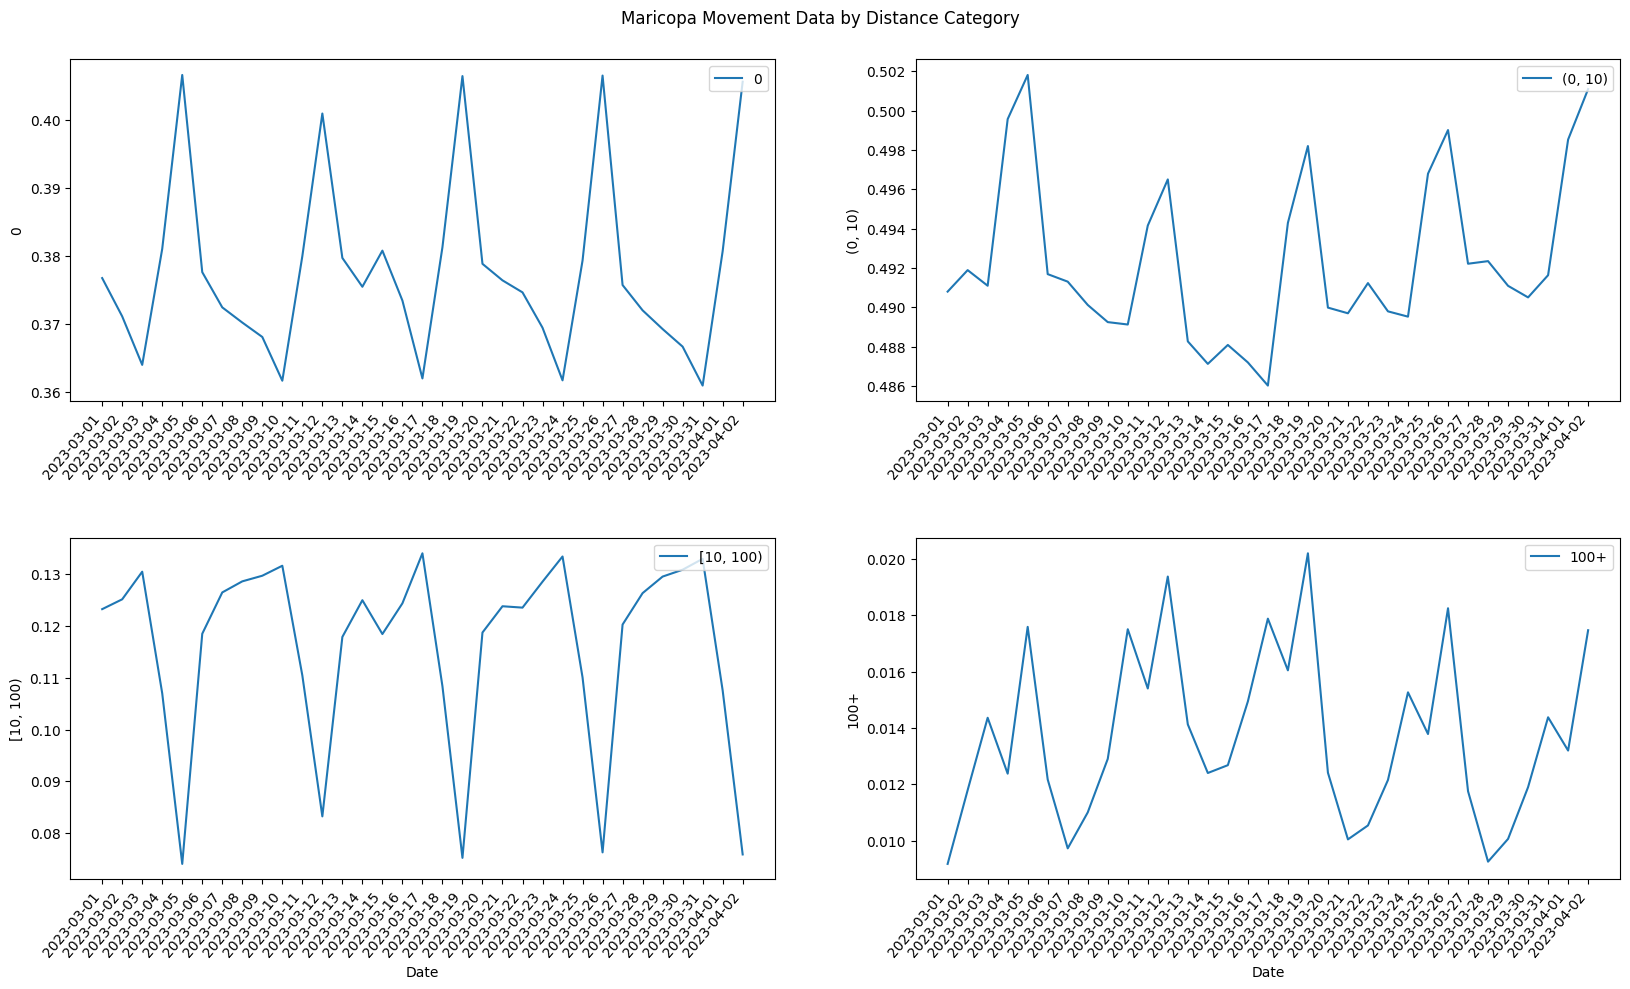

In [21]:
County = COUNTY

start_date = datetime.strptime("2023-02-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-04-02", "%Y-%m-%d")

required_categories = ["0", "(0, 10)", "[10, 100)", "100+"]


def read_and_filter_data(file_path, county_name):
    data = pd.read_csv(file_path)
    return data[data["gadm_name"] == county_name]


all_data = pd.DataFrame()

current_date = start_date
while current_date <= end_date:
    month_folder = current_date.strftime("%B_%Y")
    day_file = f"{current_date.strftime('%Y-%m-%d')}.csv"

    file_path = os.path.join(dir, month_folder, day_file)

    if os.path.exists(file_path):
        daily_data = read_and_filter_data(file_path, COUNTY)
        all_data = pd.concat([all_data, daily_data])

    current_date += timedelta(days=1)

grouped_data = (
    all_data.groupby(["ds", "home_to_ping_distance_category"])[
        "distance_category_ping_fraction"
    ]
    .mean()
    .reset_index()
)
pivot_data = grouped_data.pivot(
    index="ds",
    columns="home_to_ping_distance_category",
    values="distance_category_ping_fraction",
).reset_index()

for category in required_categories:
    if category not in pivot_data.columns:
        pivot_data[category] = 0

pivot_data = pivot_data[["ds"] + required_categories]

######################## Plotting #########################

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.4)

x = pivot_data["ds"]

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, pivot_data[required_categories[0]], label=required_categories[0])
ax1.set_ylabel(required_categories[0])
ax1.legend(loc="upper right")

ax2 = fig.add_subplot(gs[0, 1], sharex=ax1)
ax2.plot(x, pivot_data[required_categories[1]], label=required_categories[1])
ax2.set_ylabel(required_categories[1])
ax2.legend(loc="upper right")

ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3.plot(x, pivot_data[required_categories[2]], label=required_categories[2])
ax3.set_ylabel(required_categories[2])
ax3.legend(loc="upper right")
ax3.set_xlabel("Date")

ax4 = fig.add_subplot(gs[1, 1], sharex=ax1)
ax4.plot(x, pivot_data[required_categories[3]], label=required_categories[3])
ax4.set_ylabel(required_categories[3])
ax4.legend(loc="upper right")
ax4.set_xlabel("Date")

for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.get_xticklabels(), rotation=50, ha="right")

fig.suptitle(f"{County} Movement Data by Distance Category")

plt.subplots_adjust(top=0.93)

plt.savefig(
    os.path.join(dir, f"{County}_{start_date}_{end_date}_movement_data_plot.png"),
    dpi=300,
)

plt.show()

# NASA Gridded Population


In [30]:
parquet_path = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/NASA/gpw_v4_population_estimates.parquet"

# Read the Parquet file
gdf = pd.read_parquet(parquet_path)

maricopa_county_gdf = gdf[gdf["NAME2"] == "Maricopa County"]
maricopa_county_gdf

,GUBID,ISOALPHA,COUNTRYNM,NAME1,NAME2,NAME3,NAME4,NAME5,NAME6,CENTROID_X,...,A65PLUSM,A65_69M,A70PLUSM,A70_74M,A75PLUSM,A75_79M,A80PLUSM,A80_84M,A85PLUSM,geometry
68707,{A595A3F9-951B-4E5B-A345-A24DADEB589B},USA,United States of America,Arizona,Maricopa County,Census Tract 6106,Block Group 3,Block 3004,NA,-112.124130,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\xe4#\xc8\xbf\xf1\x07\\\...
68708,{E39F9C25-54F2-4C41-AAAB-12EEE1AB8241},USA,United States of America,Arizona,Maricopa County,Census Tract 6100,Block Group 4,Block 4012,NA,-112.159029,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\xc0ZM\x88-\n\\\xc0xp\x1...
68709,{FE6E4099-31DD-4C54-80E8-F88F455292E5},USA,United States of America,Arizona,Maricopa County,Census Tract 6100,Block Group 4,Block 4029,NA,-112.157291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\xe8>?\r\x11\n\\\xc0\x90...
68710,{E583D4AE-83FB-4AAD-AB19-BE135FBFB738},USA,United States of America,Arizona,Maricopa County,Census Tract 6100,Block Group 4,Block 4004,NA,-112.157097,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\xc4d\x83\xe2\r\n\\\xc0\...
68711,{06767313-659D-435C-896B-A2FEE28C5421},USA,United States of America,Arizona,Maricopa County,Census Tract 6100,Block Group 4,Block 4008,NA,-112.154604,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\xf4Gn\x06\xe5\t\\\xc0\x...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141431,{167A9F79-144F-4B67-B76B-7477A9A0649F},USA,United States of America,Arizona,Maricopa County,Census Tract 4224.02,Block Group 3,Block 3016,NA,-111.783745,...,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x000\xa8\xc4\xe2(\xf2[\xc00...
141432,{CCB5A50A-0579-47C6-99B8-AF33B0AB3F71},USA,United States of America,Arizona,Maricopa County,Census Tract 4224.02,Block Group 3,Block 3022,NA,-111.785462,...,4.0,1.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\xa4=\xbb\x02E\xf2[\xc0P...
141433,{EC024ABD-E10D-4BF8-BB94-93E357D838AF},USA,United States of America,Arizona,Maricopa County,Census Tract 4224.02,Block Group 3,Block 3009,NA,-111.782991,...,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\x14\xd4\x12\x86\x1c\xf2...
141434,{8C9352BB-0D19-4006-94C6-36D182BB26A0},USA,United States of America,Arizona,Maricopa County,Census Tract 4224.02,Block Group 3,Block 3011,NA,-111.787485,...,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,b'\x01\x01\x00\x00\x00\x0c\xb0\x84%f\xf2[\xc0\...


In [31]:
maricopa_county_gdf.loc[:, "school"] = maricopa_county_gdf[
    ["A00_04B", "A05_09B", "A10_14B", "A15_19B"]
].sum(axis=1)

maricopa_county_gdf.loc[:, "adults"] = maricopa_county_gdf[
    [
        "A20_24B",
        "A25_29B",
        "A30_34B",
        "A35_39B",
        "A40_44B",
        "A45_49B",
        "A50_54B",
        "A55_59B",
        "A60_64B",
    ]
].sum(axis=1)

maricopa_county_gdf.loc[:, "elder"] = maricopa_county_gdf["A65PLUSB"]

maricopa_county_gdf.loc[:, "Population"] = maricopa_county_gdf[
    [
        "A00_04B",
        "A05_09B",
        "A10_14B",
        "A15_19B",
        "A20_24B",
        "A25_29B",
        "A30_34B",
        "A35_39B",
        "A40_44B",
        "A45_49B",
        "A50_54B",
        "A55_59B",
        "A60_64B",
        "A65PLUSB",
    ]
].sum(axis=1)

maricopa_county_gdf.loc[:, "Population 2015"] = maricopa_county_gdf["UN_2020_E"]

maricopa_county_gdf[["school", "adults", "elder", "Population", "Population 2015"]]

/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_48870/4021295614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maricopa_county_gdf.loc[:, "school"] = maricopa_county_gdf[
/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_48870/4021295614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maricopa_county_gdf.loc[:, "adults"] = maricopa_county_gdf[
/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_48870/4021295614.py:19: SettingWithCopyWarning: 
A value is trying to be set 

,school,adults,elder,Population,Population 2015
68707,7.0,11.0,1.0,19.0,23
68708,30.0,43.0,3.0,76.0,92
68709,24.0,39.0,0.0,63.0,76
68710,12.0,37.0,2.0,51.0,62
68711,25.0,21.0,2.0,48.0,58
...,...,...,...,...,...
141431,19.0,41.0,7.0,67.0,81
141432,21.0,46.0,6.0,73.0,88
141433,17.0,36.0,10.0,63.0,76
141434,25.0,33.0,6.0,64.0,77


In [26]:
census_block_groups

,label,centroid,population,population_by_age,GEOID,geometry,ALAND,Point_Geometries,Populations,Social_centroid
0,040130101011,"[-111.77075643330394, 33.76924660709943]",1791,"[358, 781, 652]",040130101011,"POLYGON ((-111.78699 33.79047, -111.78698 33.7...",18032622,"[POINT (-111.77445326 33.7940723158), POINT (-...","[64, 0, 0, 0, 8, 22, 2, 0, 7, 21, 10, 66, 0, 0...",None
1,040130101012,"[-111.72000671148204, 33.7410933260103]",2007,"[162, 423, 1422]",040130101012,"POLYGON ((-111.78691 33.73801, -111.78692 33.7...",29178977,"[POINT (-111.728338643 33.7307418958), POINT (...","[43, 0, 0, 0, 87, 0, 23, 13, 78, 0, 12, 0, 151...",None
2,040130101013,"[-111.66697569766907, 33.72404113568911]",1264,"[0, 22, 1242]",040130101013,"POLYGON ((-111.68352 33.72266, -111.68352 33.7...",6873642,"[POINT (-111.67266724 33.718333449), POINT (-1...","[6, 0, 69, 57, 27, 12, 5, 2, 39, 0, 11, 112, 1...",None
3,040130101021,"[-111.49136471795472, 33.71546544071483]",1139,"[58, 413, 668]",040130101021,"POLYGON ((-111.88205 34.00478, -111.88203 34.0...",2368942711,"[POINT (-111.526162497 33.6403841041), POINT (...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None
4,040130101022,"[-111.8505100649063, 33.82609833466325]",1487,"[110, 284, 1093]",040130101022,"POLYGON ((-111.89139 33.81618, -111.89138 33.8...",11856136,"[POINT (-111.872161819 33.8152908786), POINT (...","[12, 25, 0, 0, 0, 58, 74, 63, 0, 0, 8, 93, 0, ...",None
...,...,...,...,...,...,...,...,...,...,...
2500,040139801001,"[-112.88186166490277, 32.66947221385736]",0,"[0, 0, 0]",040139801001,"POLYGON ((-113.33389 32.50558, -113.33387 32.5...",2912703561,"[POINT (-112.853532757 32.6596779004), POINT (...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None
2501,040139804001,"[-111.95879092988882, 33.298073567638134]",13,"[0, 9, 4]",040139804001,"POLYGON ((-111.97203 33.30526, -111.97185 33.3...",3915493,"[POINT (-111.96542826 33.2926049463), POINT (-...","[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None
2502,040139805001,"[-111.88633119332626, 33.24392529871578]",0,"[0, 0, 0]",040139805001,"POLYGON ((-111.89328 33.26139, -111.89323 33.2...",3584288,"[POINT (-111.88918577 33.2533098287), POINT (-...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",None
2503,040139806001,"[-111.61909767565444, 33.33555256790642]",4291,"[1397, 2251, 643]",040139806001,"POLYGON ((-111.63577 33.34689, -111.63576 33.3...",9912508,"[POINT (-111.618039166 33.3264467722), POINT (...","[0, 0, 0, 0, 0, 0, 0]",None


In [32]:
census_block_groups

,label,centroid,population,population_by_age,area km^2,GEOID,geometry,ALAND
0,040130101011,"[-111.77075643330394, 33.76924660709943]",1791,"[358, 781, 652]",18,040130101011,"POLYGON ((-111.78699 33.79047, -111.78698 33.7...",18032622
1,040130101012,"[-111.72000671148204, 33.7410933260103]",2007,"[162, 423, 1422]",29,040130101012,"POLYGON ((-111.78691 33.73801, -111.78692 33.7...",29178977
2,040130101013,"[-111.66697569766907, 33.72404113568911]",1264,"[0, 22, 1242]",6,040130101013,"POLYGON ((-111.68352 33.72266, -111.68352 33.7...",6873642
3,040130101021,"[-111.49136471795472, 33.71546544071483]",1139,"[58, 413, 668]",2368,040130101021,"POLYGON ((-111.88205 34.00478, -111.88203 34.0...",2368942711
4,040130101022,"[-111.8505100649063, 33.82609833466325]",1487,"[110, 284, 1093]",11,040130101022,"POLYGON ((-111.89139 33.81618, -111.89138 33.8...",11856136
...,...,...,...,...,...,...,...,...
2500,040139801001,"[-112.88186166490277, 32.66947221385736]",0,"[0, 0, 0]",2912,040139801001,"POLYGON ((-113.33389 32.50558, -113.33387 32.5...",2912703561
2501,040139804001,"[-111.95879092988882, 33.298073567638134]",13,"[0, 9, 4]",3,040139804001,"POLYGON ((-111.97203 33.30526, -111.97185 33.3...",3915493
2502,040139805001,"[-111.88633119332626, 33.24392529871578]",0,"[0, 0, 0]",3,040139805001,"POLYGON ((-111.89328 33.26139, -111.89323 33.2...",3584288
2503,040139806001,"[-111.61909767565444, 33.33555256790642]",4291,"[1397, 2251, 643]",9,040139806001,"POLYGON ((-111.63577 33.34689, -111.63576 33.3...",9912508


In [34]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# Ensure 'maricopa_county_gdf' is a GeoDataFrame with a valid geometry column
if "geometry" not in maricopa_county_gdf.columns or not isinstance(
    maricopa_county_gdf, gpd.GeoDataFrame
):
    maricopa_county_gdf = gpd.GeoDataFrame(
        maricopa_county_gdf,
        geometry=gpd.points_from_xy(
            maricopa_county_gdf["CENTROID_X"], maricopa_county_gdf["CENTROID_Y"]
        ),
    )

# Ensure 'census_block_groups' is a GeoDataFrame
if not isinstance(census_block_groups, gpd.GeoDataFrame):
    census_block_groups = gpd.GeoDataFrame(census_block_groups, geometry="geometry")

# Perform the spatial join
joined_gdf = gpd.sjoin(
    maricopa_county_gdf, census_block_groups, how="inner", predicate="within"
)

# Aggregate population and geometry data
aggregated_data = joined_gdf.groupby("index_right").agg(
    {
        "Population 2015": lambda x: list(x),  # Aggregate populations into lists
        "geometry": lambda x: list(x),  # Aggregate geometries into lists
    }
)

# Convert lists to numpy arrays for easier processing
aggregated_data["Population"] = aggregated_data["Population 2015"].apply(np.array)
aggregated_data["geometry"] = aggregated_data["geometry"].apply(np.array)

# Add aggregated data to census block groups
census_block_groups["Point_Geometries"] = None
census_block_groups["Populations"] = None

for idx in aggregated_data.index:
    census_block_groups.at[idx, "Point_Geometries"] = aggregated_data.at[
        idx, "geometry"
    ]
    census_block_groups.at[idx, "Populations"] = aggregated_data.at[idx, "Population"]


# Function to calculate weighted social centroids
def calculate_weighted_social_centroid(df):
    df["Social_centroid"] = None  # Initialize the column for social centroids

    for idx, row in df.iterrows():
        if (
            row["area km^2"] > 0.02
            and row.get("Point_Geometries") is not None
            and len(row["Point_Geometries"]) > 0
            and row.get("Populations") is not None
            and len(row["Populations"]) > 0
        ):
            if len(row["Point_Geometries"]) == len(row["Populations"]):
                weighted_latitudes = [
                    point.y * population
                    for point, population in zip(
                        row["Point_Geometries"], row["Populations"]
                    )
                ]
                weighted_longitudes = [
                    point.x * population
                    for point, population in zip(
                        row["Point_Geometries"], row["Populations"]
                    )
                ]
                total_population = sum(row["Populations"])
                if total_population > 0:
                    mean_lat = sum(weighted_latitudes) / total_population
                    mean_lon = sum(weighted_longitudes) / total_population
                    df.at[idx, "Social_centroid"] = Point(mean_lon, mean_lat)

    return df


# Calculate social centroids for census block groups
census_block_groups = calculate_weighted_social_centroid(census_block_groups)

# Display the resulting GeoDataFrame
census_block_groups


/var/folders/_v/4q2_l88n1vndy51_ksbfylnc0000gn/T/ipykernel_48870/161253164.py:21: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  joined_gdf = gpd.sjoin(


,label,centroid,population,population_by_age,area km^2,GEOID,geometry,ALAND,Point_Geometries,Populations,Social_centroid
0,040130101011,"[-111.77075643330394, 33.76924660709943]",1791,"[358, 781, 652]",18,040130101011,"POLYGON ((-111.78699 33.79047, -111.78698 33.7...",18032622,"[POINT (-111.77445326 33.7940723158), POINT (-...","[64, 0, 0, 0, 8, 22, 2, 0, 7, 21, 10, 66, 0, 0...",POINT (-111.76925564597772 33.76193973941231)
1,040130101012,"[-111.72000671148204, 33.7410933260103]",2007,"[162, 423, 1422]",29,040130101012,"POLYGON ((-111.78691 33.73801, -111.78692 33.7...",29178977,"[POINT (-111.728338643 33.7307418958), POINT (...","[43, 0, 0, 0, 87, 0, 23, 13, 78, 0, 12, 0, 151...",POINT (-111.71985716442575 33.73720198919057)
2,040130101013,"[-111.66697569766907, 33.72404113568911]",1264,"[0, 22, 1242]",6,040130101013,"POLYGON ((-111.68352 33.72266, -111.68352 33.7...",6873642,"[POINT (-111.67266724 33.718333449), POINT (-1...","[6, 0, 69, 57, 27, 12, 5, 2, 39, 0, 11, 112, 1...",POINT (-111.6731746922738 33.722296612241315)
3,040130101021,"[-111.49136471795472, 33.71546544071483]",1139,"[58, 413, 668]",2368,040130101021,"POLYGON ((-111.88205 34.00478, -111.88203 34.0...",2368942711,"[POINT (-111.526162497 33.6403841041), POINT (...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",POINT (-111.66335544491764 33.718138330709884)
4,040130101022,"[-111.8505100649063, 33.82609833466325]",1487,"[110, 284, 1093]",11,040130101022,"POLYGON ((-111.89139 33.81618, -111.89138 33.8...",11856136,"[POINT (-111.872161819 33.8152908786), POINT (...","[12, 25, 0, 0, 0, 58, 74, 63, 0, 0, 8, 93, 0, ...",POINT (-111.8601052297813 33.822655678686715)
...,...,...,...,...,...,...,...,...,...,...,...
2500,040139801001,"[-112.88186166490277, 32.66947221385736]",0,"[0, 0, 0]",2912,040139801001,"POLYGON ((-113.33389 32.50558, -113.33387 32.5...",2912703561,"[POINT (-112.853532757 32.6596779004), POINT (...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None
2501,040139804001,"[-111.95879092988882, 33.298073567638134]",13,"[0, 9, 4]",3,040139804001,"POLYGON ((-111.97203 33.30526, -111.97185 33.3...",3915493,"[POINT (-111.96542826 33.2926049463), POINT (-...","[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",POINT (-111.96940067266667 33.302559726977776)
2502,040139805001,"[-111.88633119332626, 33.24392529871578]",0,"[0, 0, 0]",3,040139805001,"POLYGON ((-111.89328 33.26139, -111.89323 33.2...",3584288,"[POINT (-111.88918577 33.2533098287), POINT (-...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",None
2503,040139806001,"[-111.61909767565444, 33.33555256790642]",4291,"[1397, 2251, 643]",9,040139806001,"POLYGON ((-111.63577 33.34689, -111.63576 33.3...",9912508,"[POINT (-111.618039166 33.3264467722), POINT (...","[0, 0, 0, 0, 0, 0, 0]",None


# National Center for Education Statistics


In [37]:
def haversine(
    centroid_1_lon: float,
    centroid_1_lat: float,
    centroid_2_lon: float,
    centroid_2_lat: float,
) -> np.double:
    R = 3959.87433
    dLat = np.radians(centroid_1_lat - centroid_2_lat)
    dLon = np.radians(centroid_1_lon - centroid_2_lon)
    lat1 = np.radians(centroid_1_lat)
    lat2 = np.radians(centroid_2_lat)

    a = np.sin(dLat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


def classify_school_type(low_grade, high_grade):
    if low_grade in ["PK"] and high_grade in ["PK"]:
        return "Preschool"
    if low_grade in ["KG"] and high_grade in ["KG"]:
        return "kindergarten School"
    if low_grade in ["PK", "KG", "01", "02", "03", "04", "05"] and high_grade in [
        "PK",
        "KG",
        "01",
        "02",
        "03",
        "04",
        "05",
    ]:
        return "Elementary School"
    elif low_grade in ["06", "07", "08"] and high_grade in ["06", "07", "08"]:
        return "Middle School"
    elif low_grade in ["09", "10", "11", "12"] and high_grade in [
        "09",
        "10",
        "11",
        "12",
    ]:
        return "High School"
    elif low_grade in ["PK", "KG", "01", "02", "03", "04", "05"] and high_grade in [
        "06",
        "07",
        "08",
    ]:
        return "Elementary/Middle School"
    elif low_grade in ["06", "07", "08"] and high_grade in ["09", "10", "11", "12"]:
        return "Middle/High School"
    else:
        return "Elementary/Middle/High School"


def random_color():
    r, g, b = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return (r / 255.0, g / 255.0, b / 255.0, 1.0)


def read_excel_file(directory, file_path, skip_rows, dtype, usecols):
    """Reads an Excel file and returns a DataFrame based on the given parameters."""
    full_path = os.path.join(directory, file_path)
    return pd.read_excel(full_path, dtype=dtype, usecols=usecols, skiprows=skip_rows)

In [30]:
random_colors = [random_color() for _ in range(len(districts))]

districts["color"] = random_colors

districts["Centroid"] = districts["geometry"].representative_point()
districts["coords"] = districts["Centroid"].apply(lambda point: (point.x, point.y))

districts = districts.to_crs(epsg=4326)

directory = os.path.expanduser(
    "~/Desktop/Github/EpiMoRPH-Modeling/social-determinate-of-health/scratch/Movement_model"
)
file_configs = [
    {
        "file_path": "shapefiles/EDGE_GEOCODE_PUBLICSCH_1920/EDGE_GEOCODE_PUBLICSCH_1920.xlsx",
        "dtype": {"CNTY": object},
        "usecols": [
            "NCESSCH",
            "CNTY",
            "STREET",
            "CITY",
            "ZIP",
            "LAT",
            "LON",
            "SCHOOLYEAR",
        ],
        "skip_rows": None,
    },
    {
        "file_path": f"School_movement/NCES_public_schools_{STATE}.xltx",
        "dtype": None,
        "usecols": [
            "NCES School ID",
            "Low Grade*",
            "High Grade*",
            "School Name",
            "District",
            "Students*",
            "Teachers*",
            "Student Teacher Ratio*",
        ],
        "skip_rows": 14,
    },
    {
        "file_path": f"School_movement/NCES_public_schools_{STATE}.xltx",
        "dtype": None,
        "usecols": [
            "NCES School ID",
            "Low Grade",
            "High Grade",
            "School Name",
            "District",
            "Students",
            "Teachers",
            "Student Teacher Ratio",
        ],
        "skip_rows": 11,
    },
]

schools_location_df = read_excel_file(
    directory,
    file_configs[0]["file_path"],
    skip_rows=file_configs[0]["skip_rows"],
    dtype=file_configs[0]["dtype"],
    usecols=file_configs[0]["usecols"],
)

if STATE != "AZ":
    schools_info_df = read_excel_file(
        directory,
        file_configs[1]["file_path"],
        skip_rows=file_configs[1]["skip_rows"],
        dtype=file_configs[1]["dtype"],
        usecols=file_configs[1]["usecols"],
    )

    schools_info_df["school type"] = schools_info_df.apply(
        lambda row: classify_school_type(row["Low Grade*"], row["High Grade*"]), axis=1
    )
    schools_info_df["Students*"] = pd.to_numeric(
        schools_info_df["Students*"], errors="coerce"
    )
else:
    schools_info_df = read_excel_file(
        directory,
        file_configs[2]["file_path"],
        skip_rows=file_configs[2]["skip_rows"],
        dtype=file_configs[2]["dtype"],
        usecols=file_configs[2]["usecols"],
    )
    schools_info_df["school type"] = schools_info_df.apply(
        lambda row: classify_school_type(row["Low Grade"], row["High Grade"]), axis=1
    )
    schools_info_df["Students"] = pd.to_numeric(
        schools_info_df["Students"], errors="coerce"
    )

NCES_public_schools_df = pd.merge(
    schools_info_df, schools_location_df, left_on="NCES School ID", right_on="NCESSCH"
)

NCES_public_schools_df = NCES_public_schools_df[NCES_public_schools_df["CNTY"] == CNTY]
NCES_public_schools_df.drop(columns=["NCESSCH"], inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexandernez/Desktop/Github/EpiMoRPH-Modeling/social-determinate-of-health/scratch/Movement_model/shapefiles/EDGE_GEOCODE_PUBLICSCH_1920/EDGE_GEOCODE_PUBLICSCH_1920.xlsx'

# Who Acquries Infection from Whom (WAIFW) Matrix


$$
\gamma = 1/7 \\
\R_0 = \text{12-18} \\
\beta_{childrens} = R_0 \cdot \gamma \\
\beta_{childrens} = 12 \cdot 1/7 \\
\beta_{childrens} = 1.714 \\

\beta_{childrens} = 18 \cdot 1/7 \\
\beta_{childrens} = 2.571 \\
$$


$$
\beta_{adults} = R_0 \cdot \gamma \\
\beta_{seniors} = R_0 \cdot \gamma \\
$$


In [17]:
beta_11 = 1.714  # Children infecting children
beta_12 = 0.00250  # Children infecting adults
beta_13 = 0.00250  # Children infecting seniors

beta_21 = 0.00250  # Adults infecting childrens
beta_22 = 0.250  # Adults infecting adults
beta_23 = 0.00250  # Adults infecting seniors

beta_31 = 0.00250  # Seniors infecting childrens
beta_32 = 0.00250  # Seniors infecting adults
beta_33 = 0.250  # Seniors infecting seniors

beta_matrix = Matrix(
    [
        [beta_11, beta_12, beta_13],
        [beta_21, beta_22, beta_23],
        [beta_31, beta_32, beta_33],
    ]
)

beta_matrix

Matrix([
[1.714, 0.025, 0.025],
[0.025,   0.3, 0.025],
[0.025, 0.025,     1]])

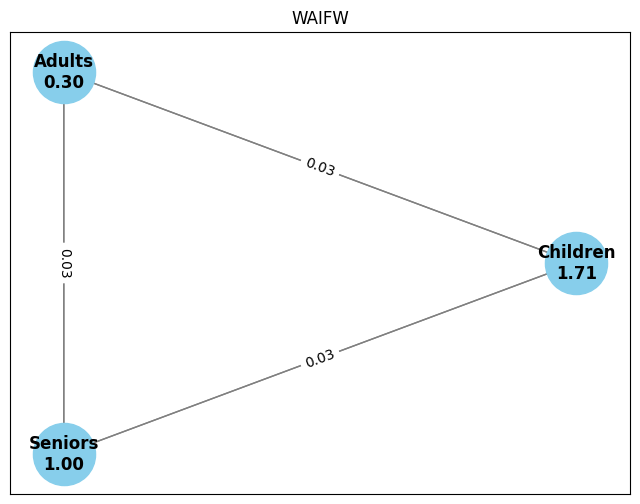

In [18]:
beta_values = {
    ("Children", "Children"): beta_11,
    ("Children", "Adults"): beta_12,
    ("Children", "Seniors"): beta_13,
    ("Adults", "Children"): beta_21,
    ("Adults", "Adults"): beta_22,
    ("Adults", "Seniors"): beta_23,
    ("Seniors", "Children"): beta_31,
    ("Seniors", "Adults"): beta_32,
    ("Seniors", "Seniors"): beta_33,
}

G = nx.DiGraph()

age_groups = ["Children", "Adults", "Seniors"]
G.add_nodes_from(age_groups)

for (i, j), beta in beta_values.items():
    if beta != 0:  # Only add edges with non-zero beta values
        G.add_edge(i, j, weight=beta)

pos = nx.circular_layout(G)

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue")
nx.draw_networkx_labels(
    G,
    pos,
    labels={node: f"{node}\n{beta_values[(node, node)]:.2f}" for node in age_groups},
    font_size=12,
    font_weight="bold",
)

nx.draw_networkx_edges(
    G, pos, edgelist=[(u, v) for u, v in G.edges() if u != v], edge_color="gray"
)

edge_labels = {(i, j): f"{beta:.2f}" for (i, j), beta in beta_values.items() if i != j}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("WAIFW")
plt.show()

# Single Strada Simulation


## School Strata


### School Inter-Population Model


In [19]:
class Sirh(CompartmentModel):
    compartments = [
        compartment("S"),
        compartment("E"),
        compartment("I"),
        compartment("R"),
        compartment("VS_1"),
        compartment("VR_1"),
        compartment("V_2"),
    ]

    requirements = [
        AttributeDef("beta_s", float, shape=Shapes.TxN),
        AttributeDef("beta_v", float, shape=Shapes.TxN),
        AttributeDef("alpha", float, shape=Shapes.TxN),
        AttributeDef("gamma", float, shape=Shapes.TxN),
        AttributeDef("omega", float, shape=Shapes.TxN),
    ]

    def edges(self, symbols: ModelSymbols) -> Sequence[TransitionDef]:
        [S, E, I, R, VS_1, VR_1, V_2] = symbols.all_compartments
        [β_s, β_v, α, γ, ω] = symbols.all_requirements

        N = Max(1, S, E, I, R, VS_1, VR_1, V_2)

        return [
            edge(S, E, rate=β_s * S * I / N),
            edge(E, I, rate=(1 / α) * E),
            edge(I, R, rate=(1 / γ) * I),
            edge(VS_1, E, rate=β_v * VS_1 * I / N),
            edge(VS_1, V_2, rate=ω * VS_1),
            edge(VR_1, V_2, rate=ω * V_2),
        ]


School_ipm = Sirh()

### School Intializers


In [14]:
census_df["population_by_age_school"] = census_df["population_by_age"].apply(
    lambda x: x[0]
)

school_explicit_df = census_df[["population_by_age_school", "label"]].copy()

school_explicit_df.columns = ["S", "geoid"]

school_explicit_df.loc[:, "E"] = 0
school_explicit_df.loc[:, "I"] = 0
school_explicit_df.loc[:, "R"] = 0

infected_seed_locations = [
    "040134223021",
    "040134223042",
    "040134223053",
    "040134223072",
    "040138149002",
    "040138150003",
    "040138154001",
    "040134226411",
    "040134226412",
    "040134226422",
    "040134226431",
    "040134226432",
    "040134226441",
    "040138144002",
    "040134225092",
    "040134224011",
    "040138176001",
    "040134226061",
    "040134223082",
    "040134223083",
    "040134224021",
    "040134223093",
    "040134224033",
    "040138154003",
    "040134226171",
    "040134225093",
    "040134226213",
    "040134226222",
    "040134226231",
    "040134226232",
    "040138146001",
    "040134225072",
    "040134225103",
    "040134225112",
    "040134225122",
    "040134226062",
    "040134226063",
    "040134226173",
    "040134226201",
]

initial_infected_size = np.zeros(len(infected_seed_locations))

total_infections = 1
np.random.seed(34)
random_indices = np.random.choice(
    len(initial_infected_size), size=total_infections, replace=True
)
for index in random_indices:
    initial_infected_size[index] += 1

for geoid, infected_count in zip(infected_seed_locations, initial_infected_size):
    if geoid in school_explicit_df["geoid"].values:
        row_index = school_explicit_df[school_explicit_df["geoid"] == geoid].index[0]
        school_explicit_df.loc[row_index, "I"] = infected_count

vaccinated_individuals = np.floor(school_explicit_df["S"] * 0.92).astype(int)
school_explicit_df.loc[:, "VR_1"] = np.floor(vaccinated_individuals * 0.95).astype(int)
school_explicit_df.loc[:, "VS_1"] = vaccinated_individuals - school_explicit_df["VR_1"]
school_explicit_df.loc[:, "V_2"] = 0
school_explicit_df.loc[:, "S"] = school_explicit_df["S"] - vaccinated_individuals

indices = [
    school_explicit_df[school_explicit_df["geoid"] == geoid].index[0]
    for geoid in infected_seed_locations
]

school_explicit_df = school_explicit_df[["S", "E", "I", "R", "VS_1", "VR_1", "V_2"]]

school_initials_array = school_explicit_df.to_numpy(dtype=int)

school_initials_array[:5]

array([[ 29,   0,   0,   0,  17, 312,   0],
       [ 13,   0,   0,   0,   8, 141,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   3,  50,   0],
       [  9,   0,   0,   0,   6,  95,   0]])

### School Simulation


ADRIO GeometricCentroid fetching `gpm:all::mm::centroid`... done (70.930 seconds)
Running simulation (BasicSimulator):
• 2019-08-05 to 2020-05-25 (294 days)
• 2505 geo nodes
|####################| 100% 
Runtime: 755.290s


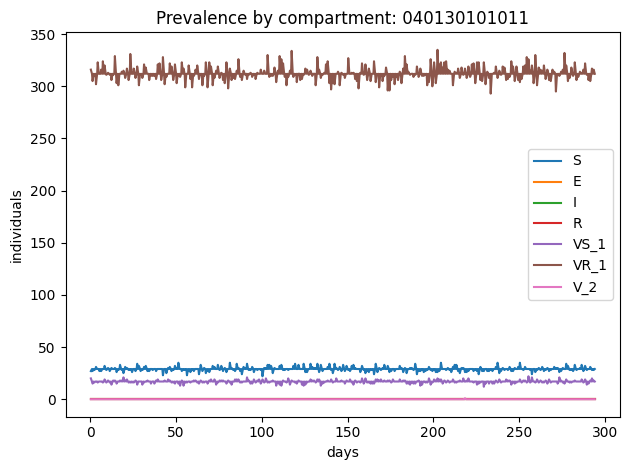

In [21]:
rume = SingleStrataRume.build(
    ipm=School_ipm,
    mm=mm_library["centroids"](),
    scope=scope,
    init=init.Explicit(initials=school_initials_array),
    time_frame=TimeFrame.of(str(School_Year_Start_str), School_Year_length),
    params={
        "beta_s": beta_11,
        "beta_v": 0.6,
        "alpha": 20,
        "gamma": 7,
        "omega": 0.0000023,
        "sigma": 0.12,
        "phi": 40,
        "phi_weekend": 20,
        "move_control": 0.1,
        "theta": 0.2,
        "population": population_by_age_school_array,
        "meta::geo::label": label_array,
        "centroid": us_tiger.GeometricCentroid(),
    },
)

sim = BasicSimulator(rume)
with sim_messaging():
    output = sim.run()

plot_pop(output, pop_idx=0)

## Adults Strata


### Adults Inter-Population Model


In [38]:
class Sirh(CompartmentModel):
    compartments = [
        compartment("S"),
        compartment("E"),
        compartment("I"),
        compartment("R"),
        compartment("V_c"),
    ]

    requirements = [
        AttributeDef("beta_s_a", float, shape=Shapes.TxN),
        AttributeDef("beta_v_a", float, shape=Shapes.TxN),
        AttributeDef("alpha", float, shape=Shapes.TxN),
        AttributeDef("gamma", float, shape=Shapes.TxN),
        AttributeDef("omega", float, shape=Shapes.TxN),
    ]

    def edges(self, symbols: ModelSymbols) -> Sequence[TransitionDef]:
        [S, E, I, R, V_c] = symbols.all_compartments
        [β_s, β_v, α, γ, ω] = symbols.all_requirements

        N = Max(1, S, E, I, R, V_c)

        return [
            edge(S, E, rate=β_s * S * I / N),
            edge(E, I, rate=(1 / α) * E),
            edge(I, R, rate=(1 / γ) * I),
            edge(V_c, E, rate=β_v * V_c * I / N),
        ]


Adult_ipm = Sirh()

### Adult Intializers


In [23]:
import numpy as np

census_df["population_by_age_adults"] = census_df["population_by_age"].apply(
    lambda x: x[1]
)

adult_explicit_df = census_df[["population_by_age_adults", "label"]].copy()

adult_explicit_df.columns = ["S", "geoid"]

adult_explicit_df["E"] = 0
adult_explicit_df["I"] = 0
adult_explicit_df["R"] = 0

adult_explicit_df["V_c"] = np.floor(adult_explicit_df["S"] * 0.99).astype(int)

adult_explicit_df["S"] = adult_explicit_df["S"] - vaccinated_individuals

num_infected = 1
random_indices = np.random.choice(
    adult_explicit_df.index, size=num_infected, replace=False
)
adult_explicit_df.loc[random_indices, "I"] = 1
adult_explicit_df.loc[random_indices, "S"] -= 1

adult_explicit_df = adult_explicit_df[["S", "E", "I", "R", "V_c"]]

adult_initials_array = adult_explicit_df.to_numpy(dtype=int)

adult_initials_array[:5]

array([[452,   0,   0,   0, 773],
       [274,   0,   0,   0, 418],
       [ 22,   0,   0,   0,  21],
       [360,   0,   0,   0, 408],
       [183,   0,   0,   0, 281]])

In [24]:
compartment_totals = adult_initials_array.sum(axis=0)
for col, tot in zip(adult_explicit_df.columns, compartment_totals):
    print(f"{col}: {tot}")
grand_total = adult_initials_array.sum()
print("Grand total of all init values:", grand_total)

S: 965736
E: 0
I: 1
R: 0
V_c: 2010397
Grand total of all init values: 2976134


In [ ]:
Now this is one is adults and should be N_a
S: 965736
E: 0
I: 1
R: 0
V_c: 2010397
Grand total of all init values: 2976134

### Adult Simulation


In [25]:
rume = SingleStrataRume.build(
    scope=scope,
    ipm=Adult_ipm,
    mm=mm_library["no"](),
    init=init.Explicit(initials=adult_initials_array),
    time_frame=TimeFrame.of(str(School_Year_Start_str), School_Year_length),
    params={
        "beta_s_a": beta_22,
        "beta_v_a": 0.6,
        "alpha": 20,
        "gamma": 10,
        "omega": 0.0000023,
        "sigma": 0.12,
        "phi": 40,
        "phi_weekend": 20,
        "move_control": 0.1,
        "theta": 0.2,
        "population": acs5.PopulationByAge(20, 59),
        "meta::geo::label": label_array,
        "centroid": us_tiger.GeometricCentroid(),
    },
)

sim = BasicSimulator(rume)
with sim_messaging():
    output = sim.run()

plot_pop(output, pop_idx=0)

InitException: Initializer 'Explicit' returned values less than zero

## Senior Strata


### Senior Inter-Population Model


In [25]:
class Sirh(CompartmentModel):
    compartments = [
        compartment("S"),
        compartment("E"),
        compartment("I"),
        compartment("R"),
        compartment("V_c"),
        compartment("V_b"),
    ]

    requirements = [
        AttributeDef("beta_s_s", float, shape=Shapes.TxN),
        AttributeDef("beta_v_s", float, shape=Shapes.TxN),
        AttributeDef("alpha", float, shape=Shapes.TxN),
        AttributeDef("gamma", float, shape=Shapes.TxN),
        AttributeDef("omega", float, shape=Shapes.TxN),
    ]

    def edges(self, symbols: ModelSymbols) -> Sequence[TransitionDef]:
        [S, E, I, R, V_c, V_b] = symbols.all_compartments
        [β_s, β_v, α, γ, ω] = symbols.all_requirements

        N = Max(1, S, E, I, R, V_c, V_b)

        return [
            edge(S, E, rate=β_s * S * I / N),
            edge(E, I, rate=(1 / α) * E),
            edge(I, R, rate=(1 / γ) * I),
            edge(V_c, E, rate=β_v * V_c * I / N),
            edge(V_b, E, rate=β_v * V_c * I / N),
        ]


Senior_ipm = Sirh()

### Senior Intializers


In [26]:
import numpy as np

census_df["population_by_age_senior"] = census_df["population_by_age"].apply(
    lambda x: x[2]
)

senior_explicit_df = census_df[["population_by_age_senior", "label"]].copy()

senior_explicit_df = census_df[["population", "label"]].copy()

senior_explicit_df.columns = ["S", "geoid"]

senior_explicit_df["E"] = 0
senior_explicit_df["I"] = 0
senior_explicit_df["R"] = 0

vaccinated_individuals = np.floor(senior_explicit_df["S"] * 0.92).astype(int)
senior_explicit_df["V_c"] = np.floor(vaccinated_individuals * 0.95).astype(int)
senior_explicit_df["V_b"] = 0
senior_explicit_df["S"] = senior_explicit_df["S"] - vaccinated_individuals

num_infected = 1
random_indices = np.random.choice(
    senior_explicit_df.index, size=num_infected, replace=False
)
senior_explicit_df.loc[random_indices, "I"] = 1
senior_explicit_df.loc[random_indices, "S"] -= 1

senior_explicit_df = senior_explicit_df[["S", "E", "I", "R", "V_c", "V_b"]]

senior_initials_array = senior_explicit_df.to_numpy(dtype=int)

senior_initials_array[:5]

array([[ 144,    0,    0,    0, 1564,    0],
       [ 161,    0,    0,    0, 1753,    0],
       [ 102,    0,    0,    0, 1103,    0],
       [  92,    0,    0,    0,  994,    0],
       [ 119,    0,    0,    0, 1299,    0]])

In [27]:
compartment_totals = senior_initials_array.sum(axis=0)
for col, tot in zip(senior_explicit_df.columns, compartment_totals):
    print(f"{col}: {tot}")
grand_total = senior_initials_array.sum()
print("Grand total of all init values:", grand_total)

S: 347491
E: 0
I: 1
R: 0
V_c: 3781070
V_b: 0
Grand total of all init values: 4128562


### Senior Simulation


Running simulation (BasicSimulator):
• 2019-08-05 to 2020-05-25 (294 days)
• 2505 geo nodes
Running simulation (BasicSimulator):
• 2019-08-05 to 2020-05-25 (294 days)
• 2505 geo nodes
Running simulation (BasicSimulator):
• 2019-08-05 to 2020-05-25 (294 days)
• 2505 geo nodes
Running simulation (BasicSimulator):
• 2019-08-05 to 2020-05-25 (294 days)
• 2505 geo nodes
Running simulation (BasicSimulator):
• 2019-08-05 to 2020-05-25 (294 days)
• 2505 geo nodes
|####################| 100% 
Runtime: 409.379s
|####################| 100% 
Runtime: 409.379s
|####################| 100% 
Runtime: 409.379s
|####################| 100% 
Runtime: 409.379s
|####################| 100% 
Runtime: 409.379s


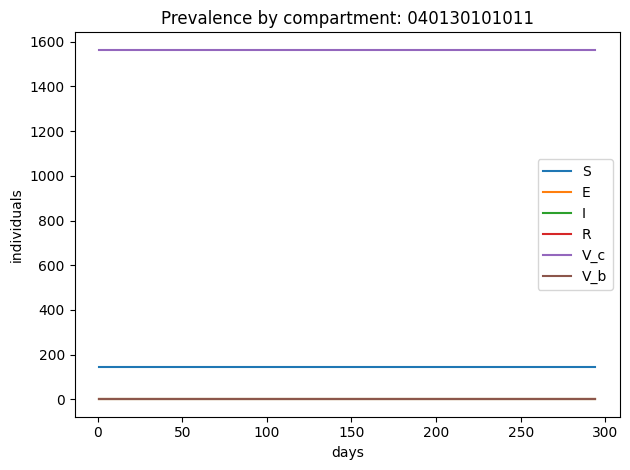

In [24]:
rume = SingleStrataRume.build(
    scope=scope,
    ipm=Senior_ipm,
    mm=mm_library["no"](),
    init=init.Explicit(initials=senior_initials_array),
    time_frame=TimeFrame.of(str(School_Year_Start_str), School_Year_length),
    params={
        "beta_s_s": beta_33,
        "beta_v_s": 0.6,
        "alpha": 20,
        "gamma": 10,
        "omega": 0.0000023,
        "sigma": 0.12,
        "phi": 40,
        "phi_weekend": 20,
        "move_control": 0.1,
        "theta": 0.2,
        "population": acs5.PopulationByAge(60, 79),
        "meta::geo::label": label_array,
        "centroid": us_tiger.GeometricCentroid(),
    },
)

sim = BasicSimulator(rume)
with sim_messaging():
    output = sim.run()

plot_pop(output, pop_idx=0)

## Multistrade Simulation

![Alt Text](/Users/alexandernez/Desktop/Github/Epymorph_vignettes/doc/Intro/drawio/Multistrade.drawio.png)


## Constucting Multistrade


In [33]:
init = (init.Explicit(initials=school_initials_array),)

AttributeError: 'tuple' object has no attribute 'Explicit'

In [37]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from sympy import Max

from epymorph import *
from epymorph.adrio import acs5, us_tiger
from epymorph.compartment_model import MultistrataModelSymbols, TransitionDef, edge
from epymorph.geography.us_census import TractScope
from epymorph.rume import MultistrataRumeBuilder
from epymorph.simulator.data import evaluate_param

In [65]:
class MyRume(MultistrataRumeBuilder):
    strata = [
        Gpm(
            name="age_00-19",
            ipm=School_ipm,
            mm=mm_library["centroids"](),
            init=init.Explicit(initials=school_initials_array),
        ),
        Gpm(
            name="age_20-59",
            ipm=Adult_ipm,
            mm=mm_library["centroids"](),
            init=init.Explicit(initials=adult_initials_array),
        ),
        Gpm(
            name="age_60-79",
            ipm=Senior_ipm,
            mm=mm_library["centroids"](),
            init=init.Explicit(initials=senior_initials_array),
        ),
    ]

    meta_requirements = [
        AttributeDef("beta_12", float, Shapes.TxN),
        AttributeDef("beta_13", float, Shapes.TxN),
        AttributeDef("beta_21", float, Shapes.TxN),
        AttributeDef("beta_23", float, Shapes.TxN),
        AttributeDef("beta_31", float, Shapes.TxN),
        AttributeDef("beta_32", float, Shapes.TxN),
    ]

    def meta_edges(self, symbols: MultistrataModelSymbols) -> list[TransitionDef]:
        # extract compartment symbols by strata
        S_1, E_1, I_1, R_1, VS_1, VR_1, V_1 = symbols.strata_compartments("age_00-19")
        S_2, E_2, I_2, R_2, V_c_2 = symbols.strata_compartments("age_20-59")
        S_3, E_3, I_3, R_3, V_c_3, V_b_3 = symbols.strata_compartments("age_60-79")

        # extract compartment totals by strata
        N_1 = Max(1, S_1 + E_1, +I_1 + E_1 + R_1 + +VS_1 + VR_1 + V_1)
        N_2 = Max(1, S_2 + E_2 + I_2 + R_2 + V_c_2)
        N_3 = Max(1, S_3 + E_3 + I_3 + R_3 + V_c_3 + V_b_3)

        # extract meta attributes
        beta_12, beta_13, beta_21, beta_23, beta_31, beta_32 = (
            symbols.all_meta_requirements
        )

        return [
            edge(S_1, I_1, rate=S_1 * beta_12 * I_2 / N_2),  # 2 infects 1
            edge(S_1, I_1, rate=S_1 * beta_13 * I_3 / N_3),  # 3 infects 1
            edge(S_2, I_2, rate=S_2 * beta_21 * I_1 / N_1),  # 1 infects 2
            edge(S_2, I_2, rate=S_2 * beta_23 * I_3 / N_3),  # 3 infects 2
            edge(S_3, I_3, rate=S_3 * beta_31 * I_1 / N_1),  # 1 infects 3
            edge(S_3, I_3, rate=S_3 * beta_32 * I_2 / N_2),  # 2 infects 3
        ]

In [66]:
rume = MyRume().build(
    scope=scope,
    time_frame=TimeFrame.of("2020-01-01", 265),
    params={
        # IPM params for specific age grops
        "gpm:age_00-19::ipm::beta_s": beta_11,
        "gpm:age_00-19::ipm::beta_v": 1.05,
        "gpm:age_20-59::ipm::beta_s_a": beta_22,
        "gpm:age_20-59::ipm::beta_v_a": 0.6,
        "gpm:age_60-79::ipm::beta_s_s": beta_33,
        "gpm:age_60-79::ipm::beta_v_s": 0.6,
        # IPM params for all
        "*::ipm::gamma": 1 / 10,
        "*::ipm::alpha": 1 / 90,
        "*::ipm::omega": 1 / 90,
        "*::ipm::xi": 1 / 90,
        "meta::ipm::beta_12": beta_12,
        "meta::ipm::beta_13": beta_13,
        "meta::ipm::beta_21": beta_21,
        "meta::ipm::beta_23": beta_23,
        "meta::ipm::beta_31": beta_31,
        "meta::ipm::beta_32": beta_32,
        # MM params
        "gpm:age_00-19::mm::phi": 40.0,
        "gpm:age_20-59::mm::phi": 40.0,
        "gpm:age_60-79::mm::phi": 40.0,
        # ADRIO things!
        "*::*::centroid": us_tiger.InternalPoint(),
        "*::*::population_by_age_table": acs5.PopulationByAgeTable(),
        "gpm:age_00-19::*::population": acs5.PopulationByAge(0, 19),
        "gpm:age_20-59::*::population": acs5.PopulationByAge(20, 59),
        "gpm:age_60-79::*::population": acs5.PopulationByAge(60, 79),
    },
)

In [67]:
sim = BasicSimulator(rume)
with sim_messaging():
    out = sim.run()

ADRIO PopulationByAgeTable fetching `gpm:age_00-19::mm::population_by_age_table`... done (0.000 seconds)
ADRIO PopulationByAge fetching `gpm:age_00-19::mm::population`... done (0.005 seconds)
ADRIO InternalPoint fetching `gpm:age_00-19::mm::centroid`... done (11.190 seconds)
ADRIO PopulationByAgeTable fetching `gpm:age_20-59::mm::population_by_age_table`... done (0.000 seconds)
ADRIO PopulationByAge fetching `gpm:age_20-59::mm::population`... done (0.002 seconds)
ADRIO InternalPoint fetching `gpm:age_20-59::mm::centroid`... done (10.399 seconds)
ADRIO PopulationByAgeTable fetching `gpm:age_60-79::mm::population_by_age_table`... done (0.000 seconds)
ADRIO PopulationByAge fetching `gpm:age_60-79::mm::population`... done (0.002 seconds)
ADRIO InternalPoint fetching `gpm:age_60-79::mm::centroid`... done (10.257 seconds)
Running simulation (BasicSimulator):
• 2020-01-01 to 2020-09-22 (265 days)
• 2505 geo nodes
|####################| 100% 
Runtime: 3649.377s


magpantay2019age

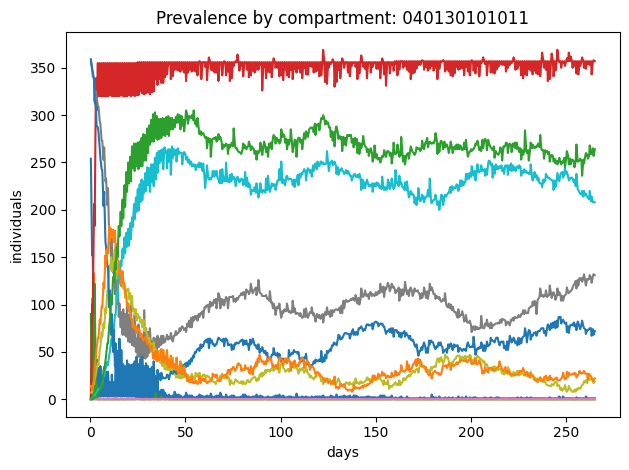

In [88]:
plot_pop(out, pop_idx=0)


def plot_pop(out: Output, pop_idx: int, log_scale: bool = False) -> None:
    """Plot all compartments for the population at the given index."""
    fig, ax = plt.subplots()
    ax.set_title(f"Prevalence by compartment: {out.geo_labels[pop_idx]}")
    ax.set_xlabel("days")
    if not log_scale:
        ax.set_ylabel("individuals")
    else:
        ax.set_ylabel("log(individuals)")
        ax.set_yscale("log")

    x_axis = out.ticks_in_days
    y_axis = out.prevalence[:, pop_idx, :]
    ax.plot(x_axis, y_axis, label=out.compartment_labels)

    if out.dim.compartments <= 12:
        ax.legend()

    fig.tight_layout()
    plt.show()


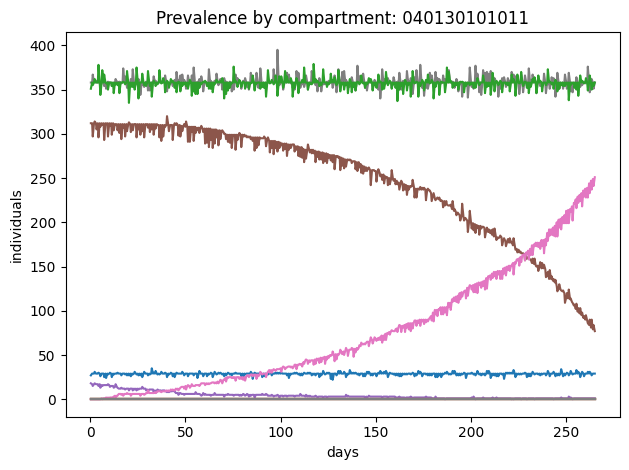

In [42]:
plot_pop(out, pop_idx=0)

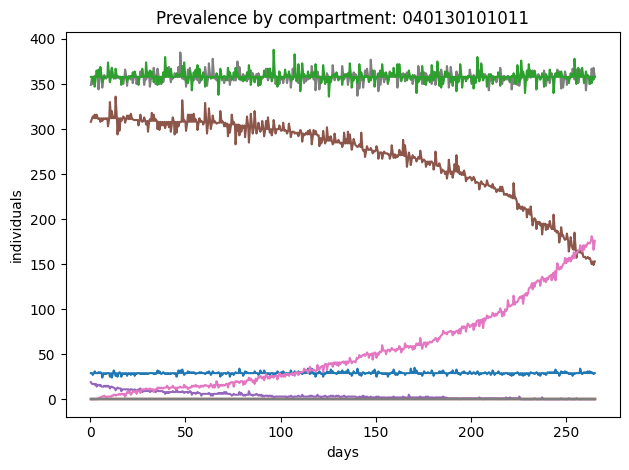

In [61]:
plot_pop(out, pop_idx=0)

In [69]:
def plot_total_pop(out: Output, figsize=(12, 8)) -> None:
    """
    Plot the combined prevalence of all compartments across all populations.
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f"Total Prevalence: {COUNTY} County")
    ax.set_xlabel("days")
    ax.set_ylabel("individuals")

    x_axis = out.ticks_in_days
    y_axis = out.prevalence.sum(axis=1)
    ax.plot(x_axis, y_axis, label=out.compartment_labels)

    if out.dim.compartments <= 12:
        ax.legend()

    fig.tight_layout()
    plt.show()


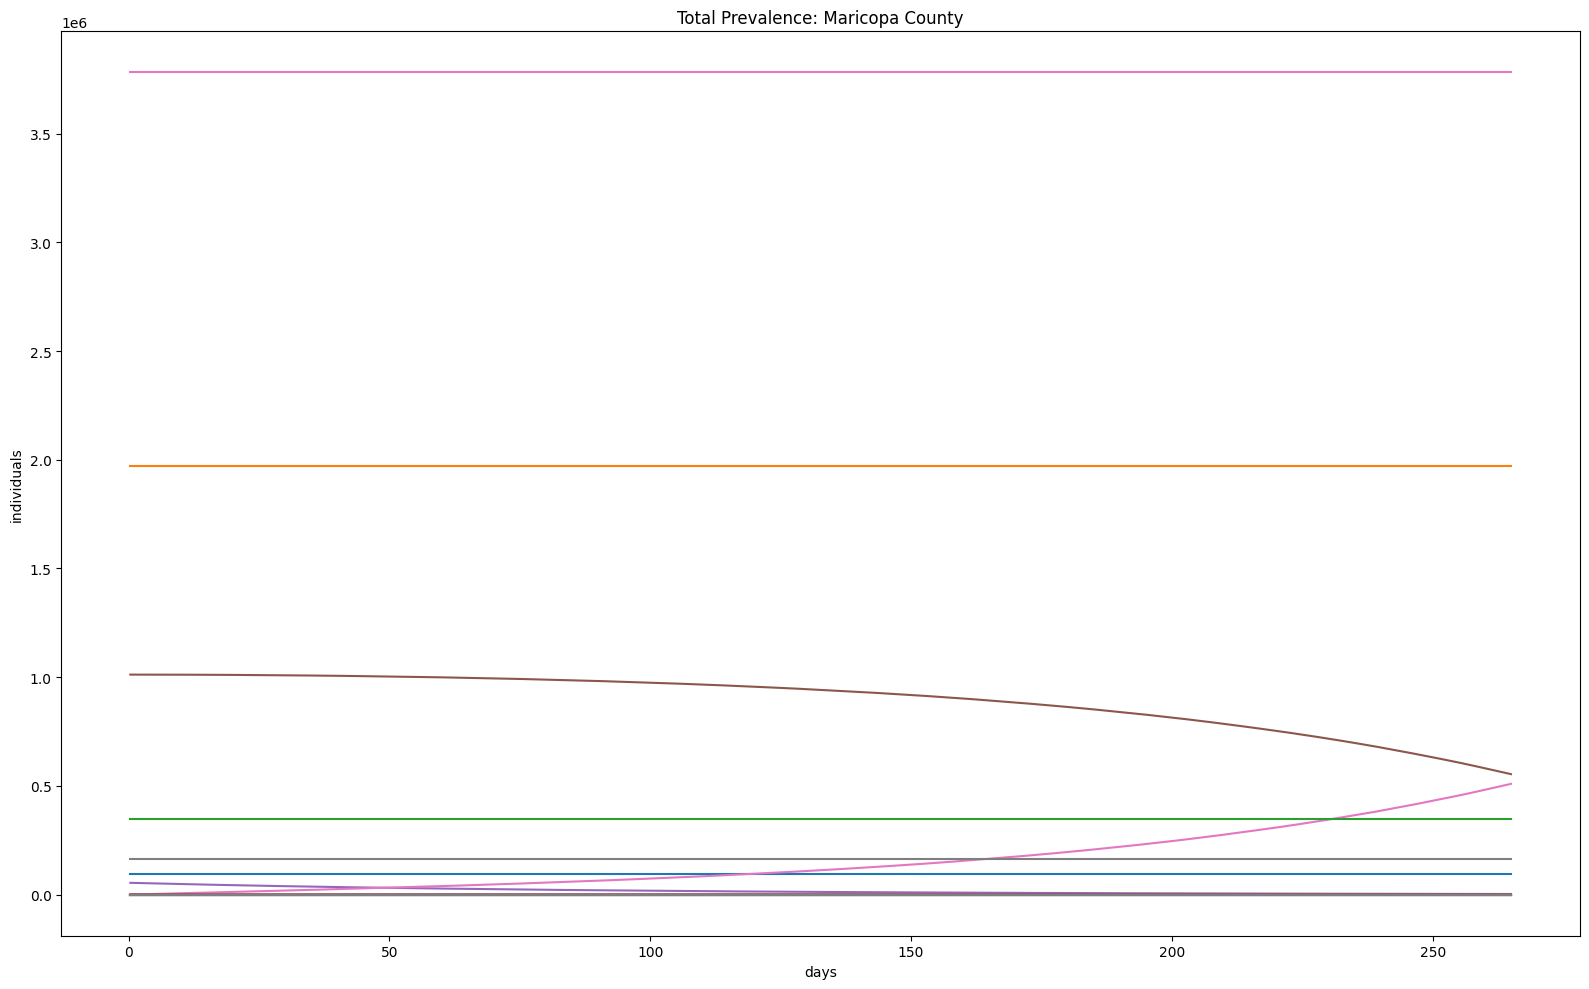

In [70]:
plot_total_pop(out, figsize=(16, 10))


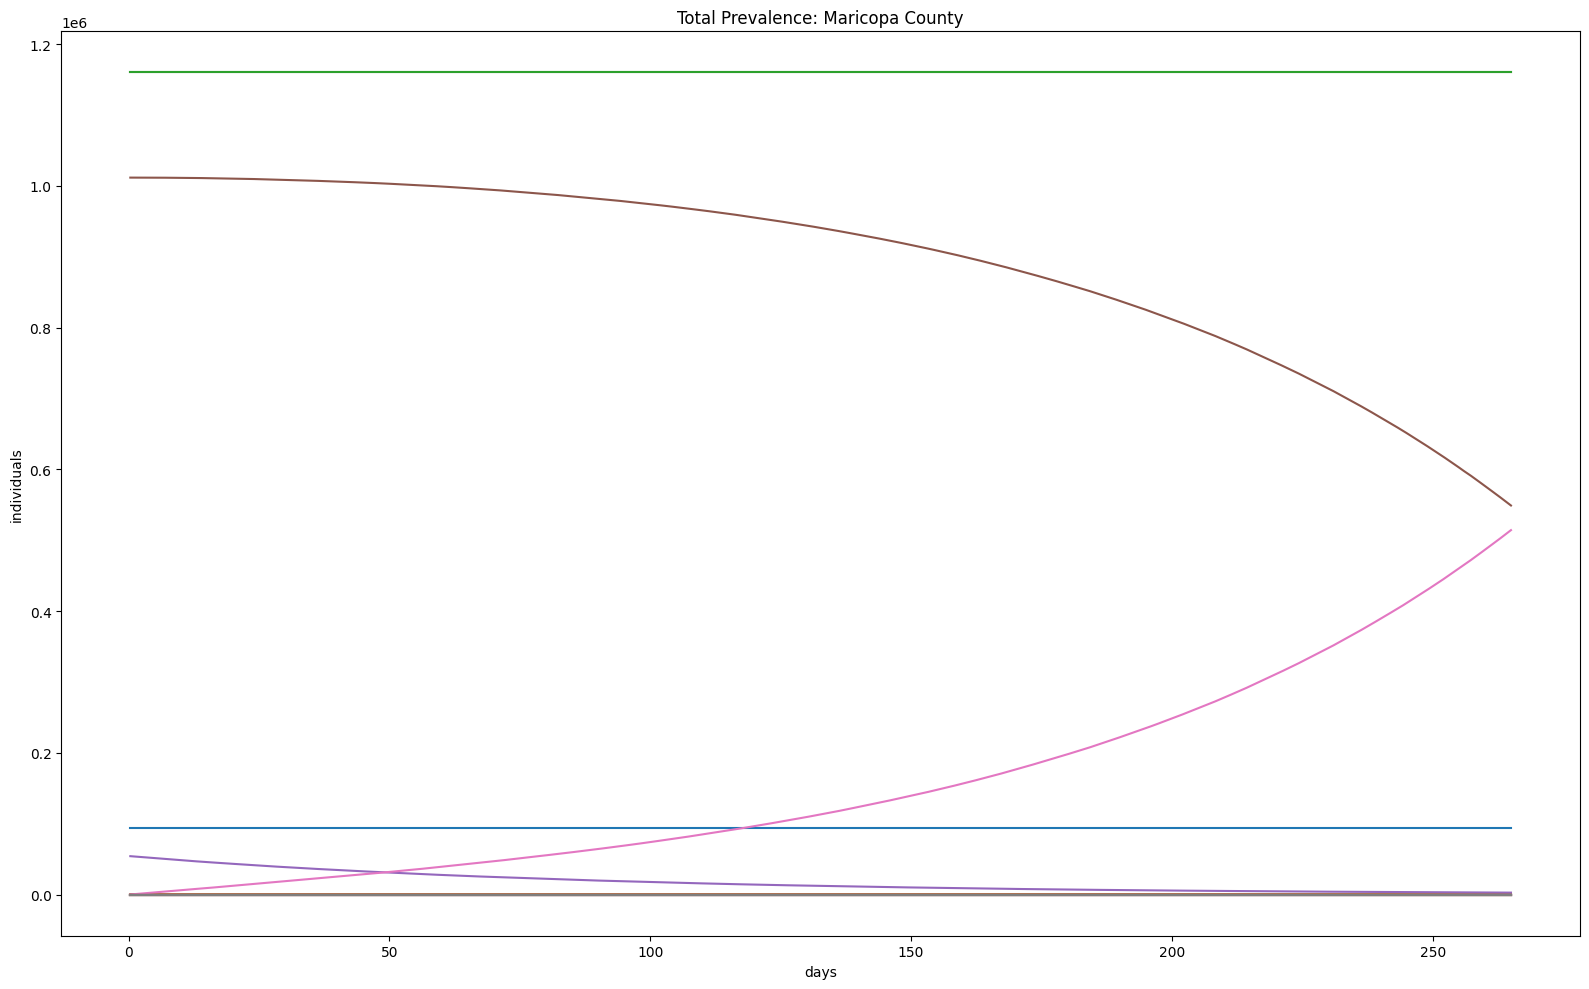

In [125]:
plot_total_pop(out, figsize=(16, 10))


In [54]:
### GRAPHS ###

pop_00_19 = evaluate_param(rume, "gpm:age_00-19::_::population")
pop_20_59 = evaluate_param(rume, "gpm:age_20-59::_::population")
pop_60_79 = evaluate_param(rume, "gpm:age_60-79::_::population")


In [130]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from sympy import Max

from epymorph import *
from epymorph.adrio import acs5, us_tiger
from epymorph.compartment_model import MultistrataModelSymbols, TransitionDef, edge
from epymorph.geography.us_census import TractScope
from epymorph.rume import MultistrataRumeBuilder
from epymorph.simulator.data import evaluate_param

In [ ]:
import numpy as np


def job(dummy_arg):
    sim = BasicSimulator(rume)

    out = sim.run()
    prevalence_array = [np.sum(out.prevalence[i, :, 1], axis=0) for i in range(150 * 2)]
    return prevalence_array


In [ ]:
import multiprocessing
from multiprocessing import get_context
from functools import partial

from epymorph import *

cpu_25 = int(multiprocessing.cpu_count() * 0.25)  # Using 2 CPU cores
cpu_50 = int(multiprocessing.cpu_count() * 0.50)  # Using 4 CPU cores
cpu_75 = int(multiprocessing.cpu_count() * 0.75)  # Using 6 CPU cores
cpu_100 = multiprocessing.cpu_count()  # Using all CPU cores


def job(weekday_phis: int, weekend_phis: int, output_name: str) -> None:
    sim = BasicSimulator(rume)

    with sim_messaging(sim):
        out = sim.run()
    # calc total new infections (depending on the IPM this may represent this as separate events)
    infection_events = [
        rume.ipm.events_by_dst("I_age_00-19"),
        rume.ipm.events_by_dst("I_age_20-59"),
        rume.ipm.events_by_dst("I_age_60-79"),
    ]

    infections = np.array(
        [
            reduce(
                lambda a, b: a + b,
                (
                    out.incidence_per_day[:, :, j].sum(axis=1)
                    for j in infection_events[i]
                ),
            )
            for i in [0, 1, 2]
        ]
    )

    ### GRAPHS ###

    # Plot infections by age class
    age_label = ["age [0,20)", "age [20,60)", "age [60,80)"]
    age_total_thousands = (
        np.column_stack(
            [geo["population_00-19"], geo["population_20-59"], geo["population_60-79"]]
        ).sum(axis=0)
        / 1000
    )
    t_window = slice(0, None)

    # Day of Peak Infection by age class
    dpi = [int(np.argmax(infections[i])) for i in [0, 1, 2]]
    max_y_value = infections.max()
    dpi_x_pos = 80  # an absolute x offset (to keep them horizontally aligned)
    dpi_y_pos = -0.025 * max_y_value  # an offset from the peak's y position

    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
    x_axis = np.arange(out.dim.days)[t_window]

    ax1.set_title("New infections by age class")
    ax1.set_ylabel("occurrences")
    for i in [0, 1, 2]:
        color = ax1._get_lines.get_next_color()
        y_axis = infections[i][t_window]
        ax1.plot(x_axis, y_axis, color=color, label=age_label[i])
        # Mark day of peak infection
        d = dpi[i]
        ax1.text(dpi_x_pos, y_axis[d] + dpi_y_pos, f"day {d}", color=color)
        ax1.hlines(
            y=y_axis[d],
            xmin=d,
            xmax=dpi_x_pos - 1,
            color=color,
            linewidth=0.5,
            linestyle="dashed",
        )
    ax1.legend()

    ax2.set_title("New infections by age class (per thousand)")
    ax2.set_xlabel("days")
    ax2.set_ylabel("occurrences per thousand")
    for i in [0, 1, 2]:
        y_axis = infections[i][t_window] / age_total_thousands[i]
        ax2.plot(x_axis, y_axis, label=age_label[i])
    ax2.legend()

    fig.tight_layout()
    plt.show()

    # Plot infections by location
    pop_label = geo["label"]
    pop_total_thousands = geo["population"] / 1000

    t_window = slice(0, 50)

    infections_by_loc = out.incidence_per_day[
        :, :, rume.ipm.events_by_dst("I_age_*")
    ].sum(axis=2, dtype=np.int64)

    fig, ax = plt.subplots(figsize=(8, 6))
    x_axis = np.arange(out.dim.days)[t_window]
    ax.set_title("New infections by location (per thousand)")
    ax.set_xlabel("days")
    ax.set_ylabel("occurrences per thousand")
    for n in range(geo.nodes):
        y_axis = infections_by_loc[t_window, n] / pop_total_thousands[n]
        ax.plot(x_axis, y_axis, linewidth=0.8)

    fig.tight_layout()
    plt.show()
    print("got here")


args = []
weekday_phis = [10]
weekend_phis = [10]
for wday_phi in weekday_phis:
    for wend_phi in weekend_phis:
        args.extend(
            [
                (
                    wday_phi,
                    wend_phi,
                    f"scratch/Multiprocessing/sim-run-wday-{wday_phi}-wend-{wend_phi}-{i}.csv",
                )
                for i in range(2)
            ]
        )

p = get_context("fork").Pool(cpu_75)
results = p.starmap(job, args)
p.close()
p.join()

# Plots


In [87]:
# calc total new infections (depending on the IPM this may represent this as separate events)
infection_events = [
    rume.ipm.events_by_dst("I_age_00-19"),
    rume.ipm.events_by_dst("I_age_20-59"),
    rume.ipm.events_by_dst("I_age_60-79"),
]

infections = np.array(
    [
        reduce(
            lambda a, b: a + b,
            (out.incidence_per_day[:, :, j].sum(axis=1) for j in infection_events[i]),
        )
        for i in [0, 1, 2]
    ]
)

### GRAPHS ###


# Plot infections by age class
age_label = ["age [0,20)", "age [20,60)", "age [60,80)"]
age_total_thousands = (
    np.column_stack(
        [geo["population_00-19"], geo["population_20-59"], geo["population_60-79"]]
    ).sum(axis=0)
    / 1000
)
t_window = slice(0, None)

# Day of Peak Infection by age class
dpi = [int(np.argmax(infections[i])) for i in [0, 1, 2]]
max_y_value = infections.max()
dpi_x_pos = 80  # an absolute x offset (to keep them horizontally aligned)
dpi_y_pos = -0.025 * max_y_value  # an offset from the peak's y position

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
x_axis = np.arange(out.dim.days)[t_window]

ax1.set_title("New infections by age class")
ax1.set_ylabel("occurrences")
for i in [0, 1, 2]:
    color = ax1._get_lines.get_next_color()
    y_axis = infections[i][t_window]
    ax1.plot(x_axis, y_axis, color=color, label=age_label[i])
    # Mark day of peak infection
    d = dpi[i]
    ax1.text(dpi_x_pos, y_axis[d] + dpi_y_pos, f"day {d}", color=color)
    ax1.hlines(
        y=y_axis[d],
        xmin=d,
        xmax=dpi_x_pos - 1,
        color=color,
        linewidth=0.5,
        linestyle="dashed",
    )
ax1.legend()

ax2.set_title("New infections by age class (per thousand)")
ax2.set_xlabel("days")
ax2.set_ylabel("occurrences per thousand")
for i in [0, 1, 2]:
    y_axis = infections[i][t_window] / age_total_thousands[i]
    ax2.plot(x_axis, y_axis, label=age_label[i])
ax2.legend()

fig.tight_layout()
plt.show()


# Plot infections by location
pop_label = geo["label"]
pop_total_thousands = geo["population"] / 1000

t_window = slice(0, 50)

infections_by_loc = out.incidence_per_day[:, :, rume.ipm.events_by_dst("I_age_*")].sum(
    axis=2, dtype=np.int64
)

fig, ax = plt.subplots(figsize=(8, 6))
x_axis = np.arange(out.dim.days)[t_window]
ax.set_title("New infections by location (per thousand)")
ax.set_xlabel("days")
ax.set_ylabel("occurrences per thousand")
for n in range(geo.nodes):
    y_axis = infections_by_loc[t_window, n] / pop_total_thousands[n]
    ax.plot(x_axis, y_axis, linewidth=0.8)

fig.tight_layout()
plt.show()

NameError: name 'reduce' is not defined

# Broken Code


In [135]:
# calc total new infections (depending on the IPM this may represent this as separate events)
infection_events = [
    rume.ipm.events_by_dst("I_age_00-19"),
    rume.ipm.events_by_dst("I_age_20-59"),
    rume.ipm.events_by_dst("I_age_60-79"),
]

infections = np.array(
    [
        reduce(
            lambda a, b: a + b,
            (out.incidence_per_day[:, :, j].sum(axis=1) for j in infection_events[i]),
        )
        for i in [0, 1, 2]
    ]
)


### GRAPHS ###

pop_00_19 = evaluate_param(rume, "gpm:age_00-19::_::population")
pop_20_59 = evaluate_param(rume, "gpm:age_20-59::_::population")
pop_60_79 = evaluate_param(rume, "gpm:age_60-79::_::population")

# Plot infections by age class
age_label = ["age [0,20)", "age [20,60)", "age [60,80)"]
age_total_thousands = np.array([pop_00_19, pop_20_59, pop_60_79]).sum(axis=1) / 1000
t_window = slice(0, None)

# Day of Peak Infection by age class
dpi = [int(np.argmax(infections[i])) for i in [0, 1, 2]]
max_y_value = infections.max()
dpi_x_pos = 80  # an absolute x offset (to keep them horizontally aligned)
dpi_y_pos = -0.025 * max_y_value  # an offset from the peak's y position

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
x_axis = np.arange(out.dim.days)[t_window]

ax1.set_title("New infections by age class")
ax1.set_ylabel("occurrences")
for i in [0, 1, 2]:
    color = ax1._get_lines.get_next_color()
    y_axis = infections[i][t_window]
    ax1.plot(x_axis, y_axis, color=color, label=age_label[i])
    # Mark day of peak infection
    d = dpi[i]
    ax1.text(dpi_x_pos, y_axis[d] + dpi_y_pos, f"day {d}", color=color)
    ax1.hlines(
        y=y_axis[d],
        xmin=d,
        xmax=dpi_x_pos - 1,
        color=color,
        linewidth=0.5,
        linestyle="dashed",
    )
ax1.legend()

ax2.set_title("New infections by age class (per thousand)")
ax2.set_xlabel("days")
ax2.set_ylabel("occurrences per thousand")
for i in [0, 1, 2]:
    y_axis = infections[i][t_window] / age_total_thousands[i]
    ax2.plot(x_axis, y_axis, label=age_label[i])
ax2.legend()

fig.tight_layout()
plt.show()


# Plot infections by location
pop_total_thousands = (pop_00_19 + pop_20_59 + pop_60_79) / 1000

t_window = slice(0, 50)

infections_by_loc = out.incidence_per_day[:, :, rume.ipm.events_by_dst("I_age_*")].sum(
    axis=2, dtype=np.int64
)

fig, ax = plt.subplots(figsize=(8, 6))
x_axis = np.arange(out.dim.days)[t_window]
ax.set_title("New infections by location (per thousand)")
ax.set_xlabel("days")
ax.set_ylabel("occurrences per thousand")
for n in range(rume.dim.nodes):
    y_axis = infections_by_loc[t_window, n] / pop_total_thousands[n]
    ax.plot(x_axis, y_axis, linewidth=0.8)

fig.tight_layout()
plt.show()

TypeError: reduce() of empty iterable with no initial value

In [29]:
import os
import numpy as np
import time
from epymorph import *


def main():
    start_time = time.time()

    rume = Rume.single_strata(
        ipm=ipm_library["pei"](),
        mm=mm_library["no"](),
        scope=scope,
        init=init.SingleLocation(location=0, seed_size=1_000),
        time_frame=TimeFrame.of("2015-01-01", 365),
        params={
            "theta": 0.1,
            "move_control": 0.9,
            "infection_duration": 4,
            "immunity_duration": 90,
            "centroid": geo["centroid"],
            "population": geo["population"],
            "commuters": geo["commuters"],
            "humidity": geo["humidity"],
            "meta::geo::label": geo["label"],
        },
    )

    sim = BasicSimulator(rume)
    with sim_messaging(sim):
        out = sim.run()

    user = os.getenv("USER")
    job_id = os.getenv("SLURM_ARRAY_JOB_ID", "?")
    task_id = os.getenv("SLURM_ARRAY_TASK_ID", "?")

    folder = f"/scratch/{user}/epymorph-jobs/job_{job_id}"
    os.makedirs(folder, exist_ok=True)

    # Save the simulation results
    np.savez(
        f"{folder}/results_{task_id}.npz",
        prevalence=out.prevalence,
        incidence=out.incidence,
    )

    end_time = time.time()
    execution_time = end_time - start_time

    with open(
        f"{folder}/execution_time_{task_id}.txt", "a"
    ) as f:  # Append to the same file
        f.write(f"Task ID: {task_id}, Execution time: {execution_time:.2f} seconds\n")


if __name__ == "__main__":
    main()

AttributeError: type object 'Rume' has no attribute 'single_strata'

In [40]:
rume = Rume.single_strata(
    scope=scope,
    ipm=Senior_ipm,
    mm=mm_library["no"](),
    init=init.Explicit(initials=senior_initials_array),
    time_frame=TimeFrame.of(str(School_Year_Start_str), School_Year_length),
    params={
        "beta": 0.4,
        "gamma": 1 / 6,
        "xi": 1 / 90,
        "theta": 0.1,
        "move_control": 0.9,
        "population": population_by_age_senior_array,
        "meta::geo::label": label_array,
    },
)

sim = BasicSimulator(rume)
with sim_messaging(sim):
    out = sim.run()
    plot_event(out, rume.ipm.events_by_dst("I")[0])

AttributeError: type object 'Rume' has no attribute 'single_strata'

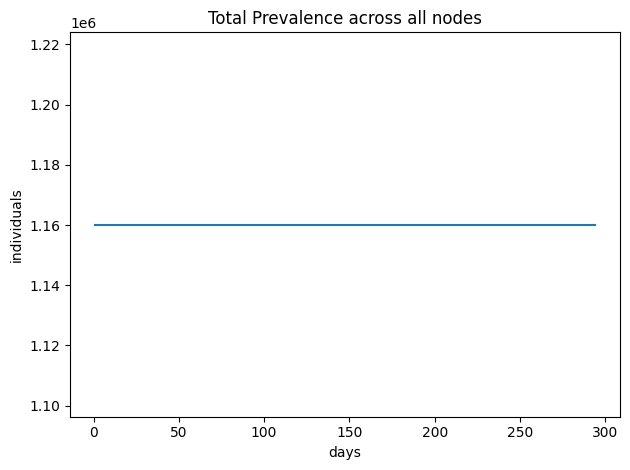

In [32]:
def plot_pop(out: Output, log_scale: bool = False) -> None:
    """Plot the sum of all compartments and nodes across all populations."""
    fig, ax = plt.subplots()
    ax.set_title(f"Total Prevalence across all nodes")
    ax.set_xlabel("days")

    if not log_scale:
        ax.set_ylabel("individuals")
    else:
        ax.set_ylabel("log(individuals)")
        ax.set_yscale("log")

    x_axis = out.ticks_in_days
    # Summing across both the pop_idx (axis 1) and compartments (axis 2)
    y_axis_sum = out.prevalence.sum(axis=(1, 2))
    ax.plot(x_axis, y_axis_sum, label="Total Prevalence")

    fig.tight_layout()
    plt.show()


plot_pop(output)
